# Project:  Customer Personality Analysis
<a id='intro'></a>
## Introduction
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment

<a id='wrangling'></a>
## Data Wrangling

In this section of the notebook, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('marketing_campaign_imputed.csv')
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   
5  2013-09-09       16       520         42               98                0   
6  2012-11-13       34       235         65              164               50   
7  2013-08-05       32        76         10               56                3   
8  2013-06-06       19        14          0               24                3   
9  2014-03-13       68        28          0                6                1   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   
5                42            14                  2                6   
6                49            27                  4                7   
7                 1            23                  2                4   
8                 3             2                  1                3   
9                 1            13                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   
5                    4                 10                  6             0   
6                    3                  7                  6             0   
7                    0                  4                  8             0   
8                    0                  2                  9             0   
9                    0                  0                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  AcceptedCmp6  \
0             0             0             0             0             1   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2237 non-null   int64  
 1   Year_Birth                  2237 non-null   int64  
 2   Education                   2237 non-null   object 
 3   Marital_Status              2237 non-null   object 
 4   Income                      2237 non-null   float64
 5   Kidhome                     2237 non-null   int64  
 6   Teenhome                    2237 non-null   int64  
 7   Dt_Customer                 2237 non-null   object 
 8   Recency                     2237 non-null   int64  
 9   MntWines                    2237 non-null   int64  
 10  MntFruits                   2237 non-null   int64  
 11  MntMeatProducts             2237 non-null   int64  
 12  MntFishProducts             2237 non-null   int64  
 13  MntSweetProducts            2237 

In [5]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2237.000000  2237.000000    2237.000000  2237.000000  2237.000000   
mean    5590.009835  1968.867233   51950.817439     0.444345     0.506482   
std     3244.446902    11.790994   21458.694432     0.538467     0.544593   
min        0.000000  1900.000000    1730.000000     0.000000     0.000000   
25%     2829.000000  1959.000000   35523.000000     0.000000     0.000000   
50%     5455.000000  1970.000000   51267.000000     0.000000     0.000000   
75%     8420.000000  1977.000000   68281.000000     1.000000     1.000000   
max    11191.000000  1996.000000  162397.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2237.000000  2237.000000  2237.000000      2237.000000   
mean     49.138578   303.998212    26.266875       166.912383   
std      28.970013   336.572054    39.717437       225.664208   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     1.000000        16.000000   
50%      49.000000   174.000000     8.000000        67.000000   
75%      74.000000   504.000000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2237.000000       2237.000000   2237.000000        2237.000000   
mean         37.522575         27.070183     43.974519           2.325436   
std          54.640155         41.293151     52.051473           1.932803   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2237.000000          2237.000000        2237.000000   
mean          4.086723             2.662494           5.793920   
std           2.779716             2.923456           3.251393   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2237.000000   2237.000000   2237.000000   2237.000000   
mean            5.318730      0.072865      0.074654      0.072418   
std             2.426352      0.259974      0.262890      0.259237   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp6  Total_Spent  \
count   2237.000000   2237.000000   2237.000000  2237.000000   
mean       0.064372      0.013411      0.149307   605.744747   
std        0.245469      0.115052      0.356471   601.839257   
min        0.000000      0.000000      0.000000     5.000000   
25%        0.000000      0.000000      0.000000    69.000000   
50%        0.000000      0.000000      0.000000   396.000000   
75%        0.000000      0.000000      0.000000  1045.000000   
max        1.000000      1.000000      1.000000  2525.000000   

       Total_Num_of_Purchases  children_home          Age  \
count             2237.000000    2237.000000  2237.000000   
mean                12.543138       0.950827    45.132767   
std                  7.206732       0.752037    11.790994

In [6]:
df.shape

(2237, 32)

In [7]:
df.isnull().sum()

ID                             0
Year_Birth                     0
Education                      0
Marital_Status                 0
Income                         0
Kidhome                        0
Teenhome                       0
Dt_Customer                    0
Recency                        0
MntWines                       0
MntFruits                      0
MntMeatProducts                0
MntFishProducts                0
MntSweetProducts               0
MntGoldProds                   0
NumDealsPurchases              0
NumWebPurchases                0
NumCatalogPurchases            0
NumStorePurchases              0
NumWebVisitsMonth              0
AcceptedCmp3                   0
AcceptedCmp4                   0
AcceptedCmp5                   0
AcceptedCmp1                   0
AcceptedCmp2                   0
AcceptedCmp6                   0
Total_Spent                    0
Total_Num_of_Purchases         0
children_home                  0
Age                            0
Time_since

In [8]:
df['Dt_Customer'].describe()

count           2237
unique           663
top       2012-08-31
freq              12
Name: Dt_Customer, dtype: object

<a id ='eda'></a>
## Exploratory Data Analysis

In this section we will deeply analyze the customer features and classify customers based on their income. Analysis Visualization is used to give beter insights and understanding of the analysis.

In [10]:
df["Income_categories"] = pd.cut( x=df["Income"], bins=[0, 25000, 50000, 75000 , np.inf], labels=["Low", "Lower_middle", "Upper_middle","High"])
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  AcceptedCmp6  \
0             0             0             0             0             1   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Total_Spent  Total_Num_of_Purchases  children_home  Age  \
0         1617                      22              0   57   
1           27                       4              2   60   
2          776                      20              0   49   
3           53                       6              1   30   
4          422                      14              1   33   

   Time_since_customer(Years) Income_categories  
0                    2.658508      Upper_middle  
1                    0.342238      Lower_middle  
2                    1.292292      Upper_middle  
3                    0.177964      Lower_middle  
4                    0.878868      Upper_middle

Text(0, 0.5, '')

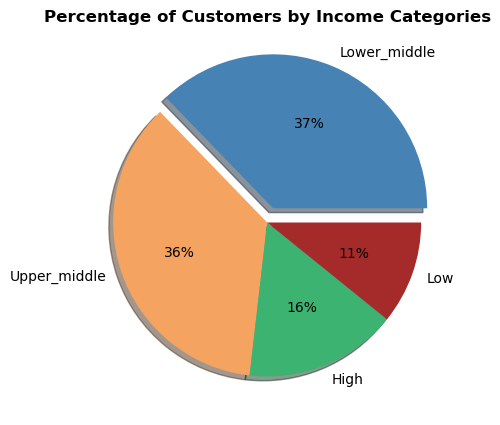

In [11]:

df['Income_categories'].value_counts().plot( kind='pie',figsize= (10,5), explode= [0.1,0,0,0], autopct='%1.0f%%', 
shadow=True, colors= ['steelblue','sandybrown','mediumseagreen', 'brown'] )
plt.title(label= 'Percentage of Customers by Income Categories',fontweight='bold')
plt.ylabel(None)

Text(0, 0.5, ' Money Spent')

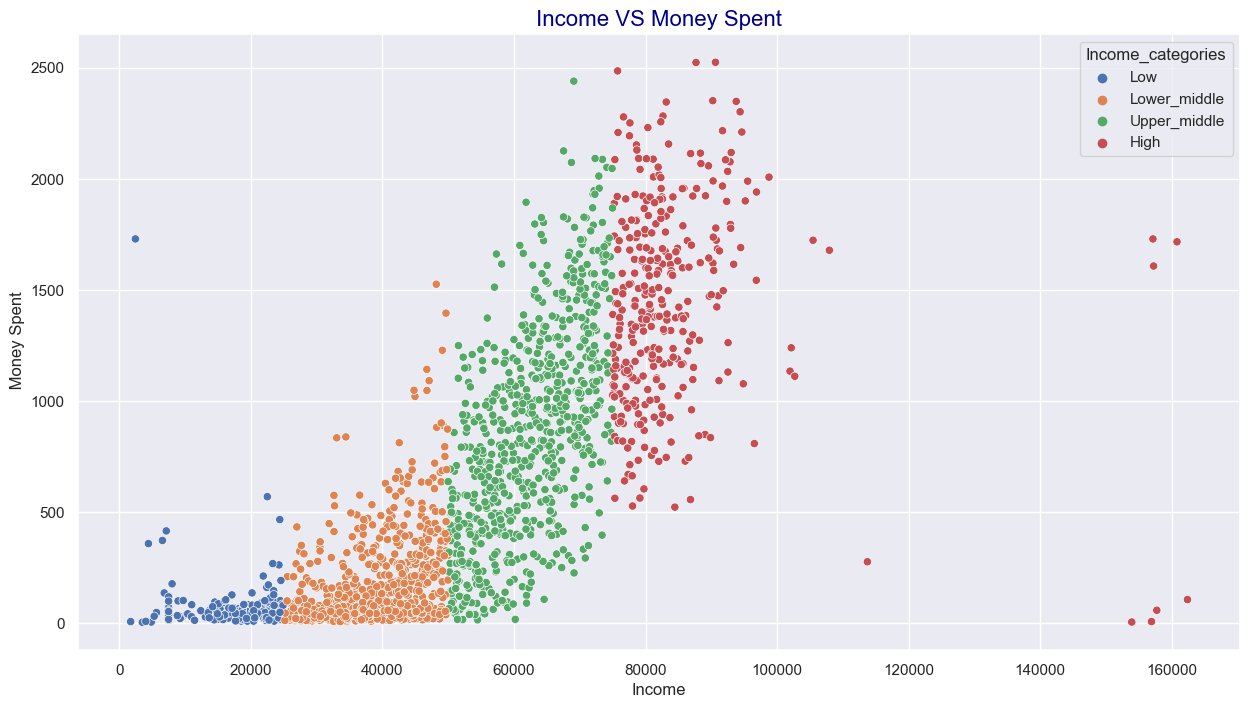

In [12]:
sb.set(style="darkgrid")
plt.figure(figsize=(15,8))
sb.scatterplot(data=df,x='Income',y='Total_Spent', hue='Income_categories', palette='deep').set_title(label='Income VS Money Spent', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')

In [224]:
df_summary_Inc = df.groupby('Income_categories').agg(
    {
        'Total_Spent': 'mean',
        'Income':'mean',
        'Total_Num_of_Purchases': 'mean',
        'Age': 'mean',
        'children_home': lambda x: x.value_counts().index[0],
        'Education': lambda x: x.value_counts().index[0],
        'Marital_Status': lambda x: x.value_counts().index[0],
    }
)
df_summary_Inc

Total_Spent        Income  Total_Num_of_Purchases  \
Income_categories                                                      
Low                  71.975207  18315.805785                5.297521   
Lower_middle        170.955582  37946.821939                7.415366   
Upper_middle        849.322139  62326.414344               16.909204   
High               1431.206704  83970.429620               19.567039   

                         Age  children_home   Education Marital_Status  
Income_categories                                                       
Low                38.033058              1  Graduation        Married  
Lower_middle       43.991597              1  Graduation        Married  
Upper_middle       47.958955              1  Graduation        Married  
High               46.240223              0  Graduation        Married

Text(0, 0.5, 'Money Spent')

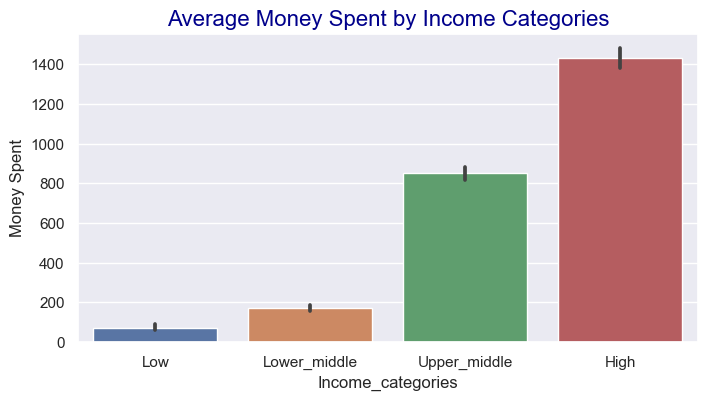

In [13]:
sb.set(style="darkgrid")
plt.figure(figsize=(8,4))
sb.barplot(data=df, y='Total_Spent',x='Income_categories')
plt.title(label='Average Money Spent by Income Categories', fontsize=16, color='darkblue')
plt.ylabel('Money Spent')

Text(0, 0.5, 'Money Spent')

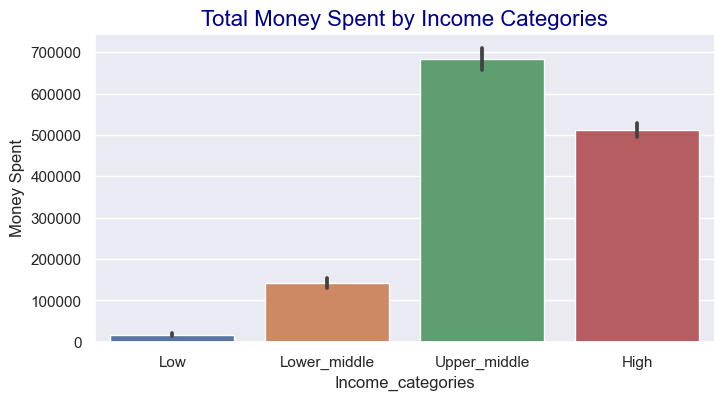

In [14]:
sb.set(style="darkgrid")
plt.figure(figsize=(8,4))
sb.barplot(data=df, y='Total_Spent',x='Income_categories', estimator=sum)
plt.title(label='Total Money Spent by Income Categories', fontsize=16, color='darkblue')
plt.ylabel('Money Spent')

Text(0, 0.5, 'Average Money Spent')

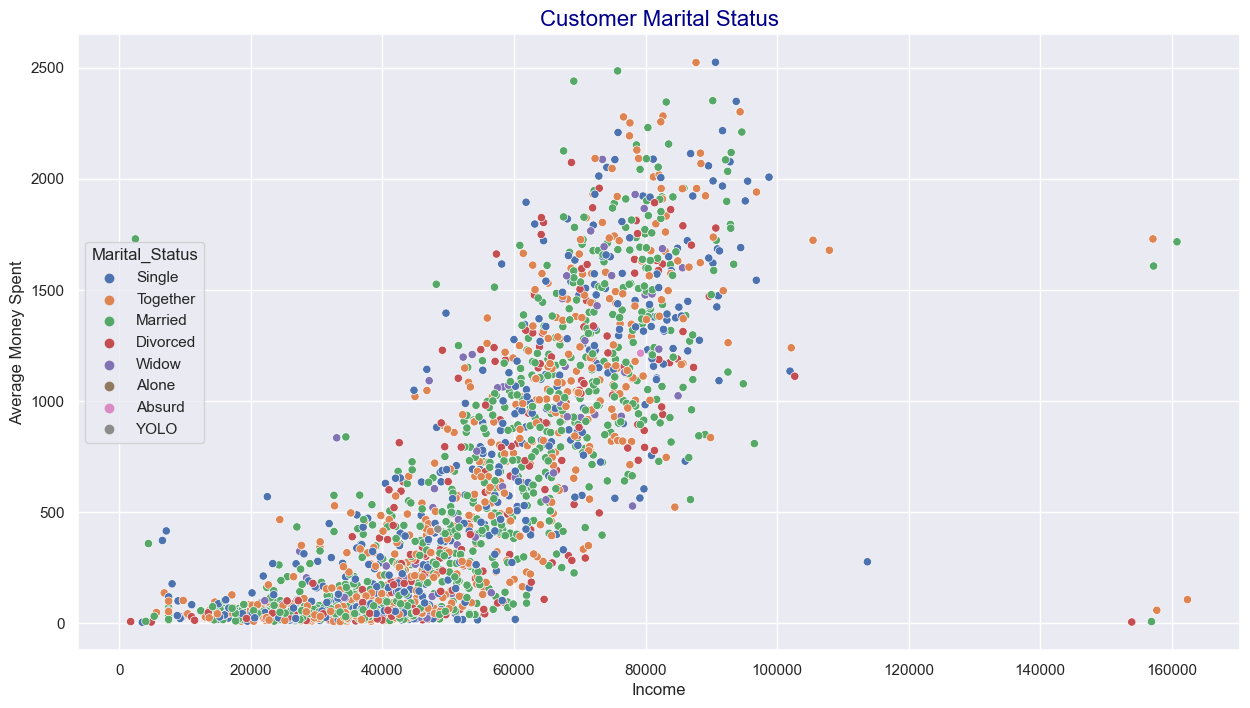

In [15]:
sb.set(style="darkgrid")
plt.figure(figsize=(15,8))
sb.scatterplot(data=df,y='Total_Spent', x='Income', hue='Marital_Status', palette='deep').set_title(label='Customer Marital Status', fontsize=16, color='darkblue')
plt.ylabel('Average Money Spent')

Text(0, 0.5, '')

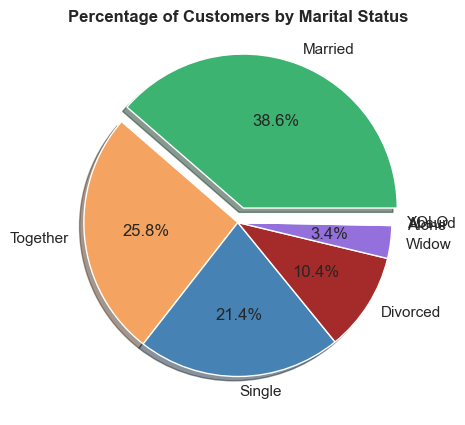

In [16]:
df['Marital_Status'].value_counts().plot( kind='pie',figsize= (10,5), explode= [0.1,0,0,0,0,0,0,0], autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 3 else ' ', 
shadow=True, colors= ['mediumseagreen','sandybrown','steelblue', 'brown','mediumpurple'] )
plt.title(label= 'Percentage of Customers by Marital Status',fontweight='bold')
plt.ylabel(None)

Text(0, 0.5, 'Money Spent')

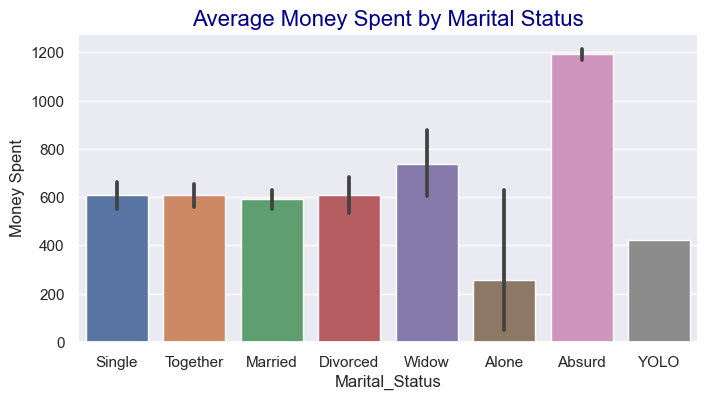

In [17]:
sb.set(style="darkgrid")
plt.figure(figsize=(8,4))
# for plot in ['MntWines','MntMeatProducts', 'MntSweetProducts','MntFishProducts', 'MntGoldProds'] :
sb.barplot(data=df, y='Total_Spent',x='Marital_Status')
plt.title(label='Average Money Spent by Marital Status', fontsize=16, color='darkblue')
plt.ylabel('Money Spent')

Text(0, 0.5, 'Average Money Spent')

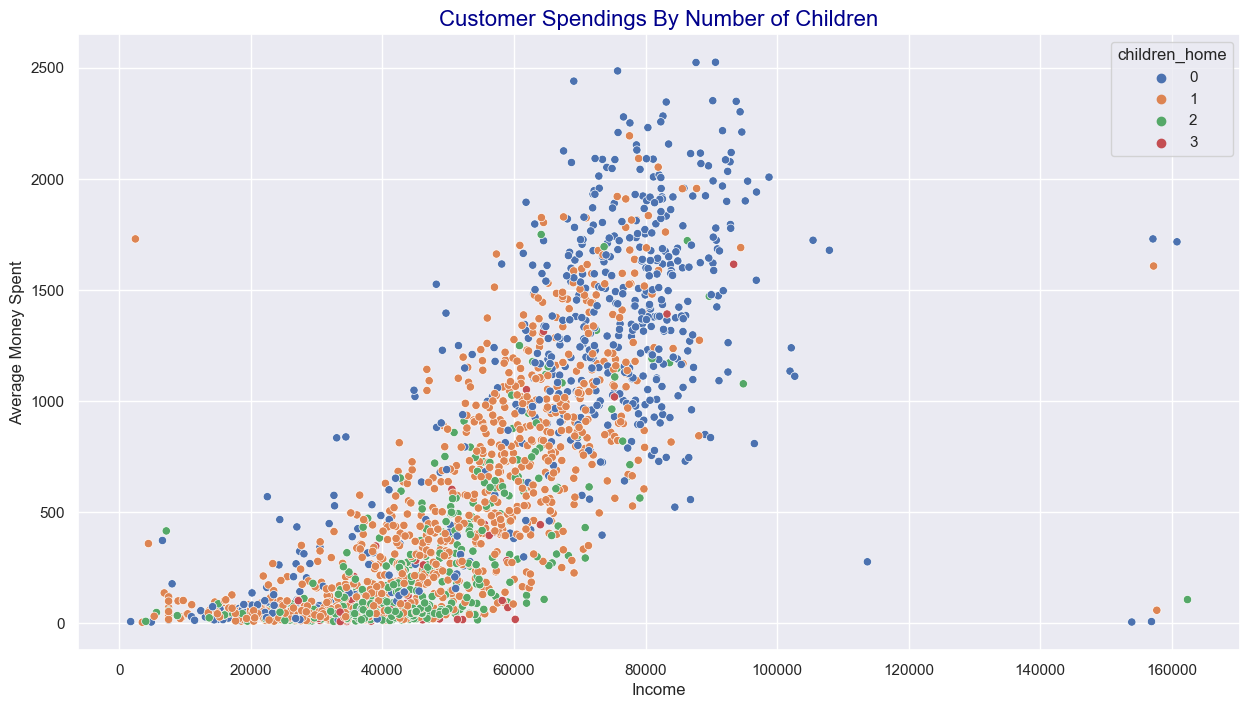

In [18]:
sb.set(style="darkgrid")
plt.figure(figsize=(15,8))
sb.scatterplot(data=df,y='Total_Spent', x='Income', hue='children_home', palette='deep').set_title(label='Customer Spendings By Number of Children', fontsize=16, color='darkblue')
plt.ylabel('Average Money Spent')

Text(0, 0.5, '')

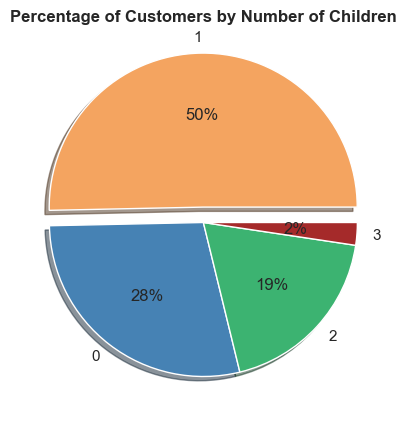

In [19]:
df['children_home'].value_counts().plot( kind='pie',figsize= (10,5), explode= [0.1,0,0,0], autopct='%1.0f%%', 
shadow=True, colors= ['sandybrown','steelblue','mediumseagreen', 'brown'] )
plt.title(label= 'Percentage of Customers by Number of Children',fontweight='bold')
plt.ylabel(None)

Text(0, 0.5, 'Average Money Spent')

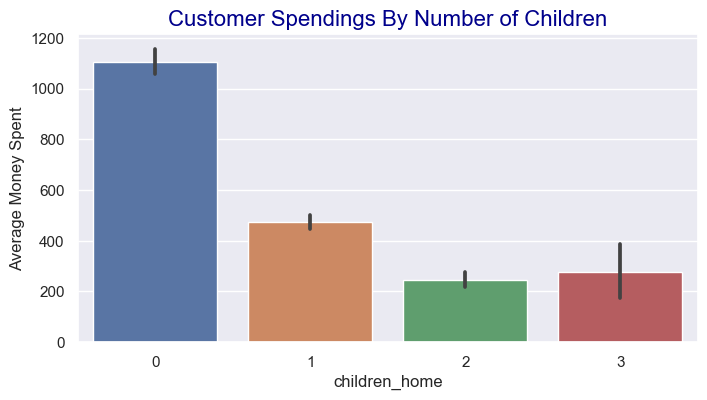

In [20]:
sb.set(style="darkgrid")
plt.figure(figsize=(8,4))
sb.barplot(data=df,y='Total_Spent', x='children_home', palette='deep').set_title(label='Customer Spendings By Number of Children', fontsize=16, color='darkblue')
plt.ylabel('Average Money Spent')

Text(0, 0.5, 'Money Spent')

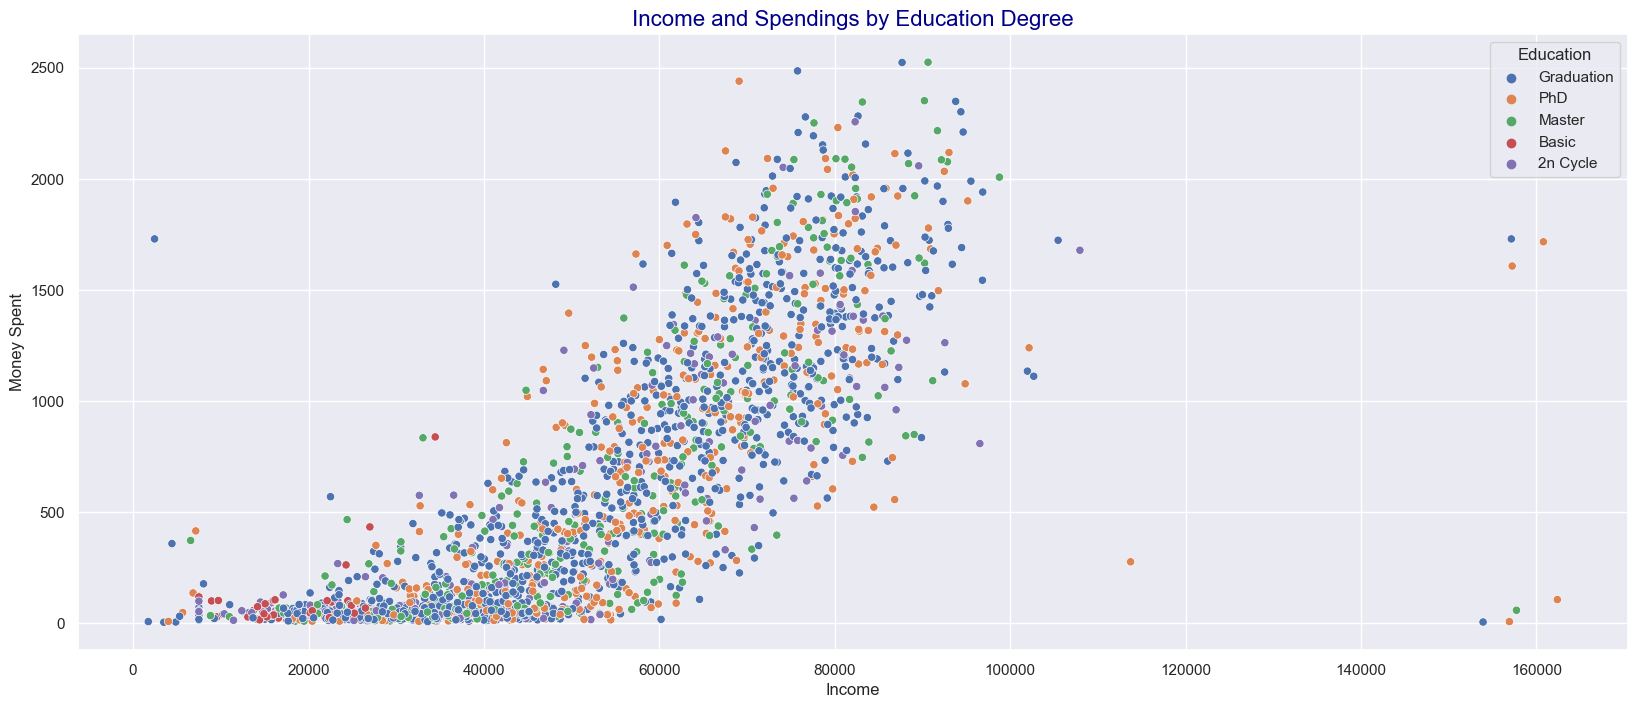

In [21]:
sb.set(style="darkgrid")
plt.figure(figsize=(20,8))
sb.scatterplot(data=df,x='Income',y='Total_Spent', hue='Education', palette='deep').set_title(label='Income and Spendings by Education Degree', fontsize=16, color='darkblue')
plt.ylabel('Money Spent')

Text(0, 0.5, '')

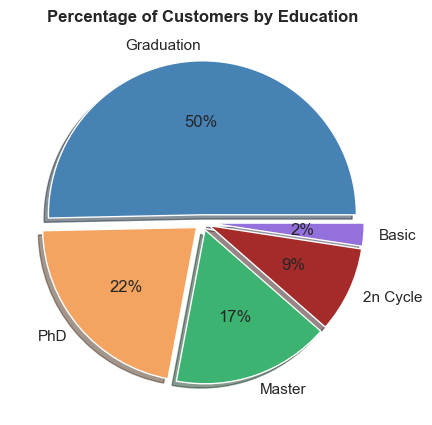

In [22]:
df['Education'].value_counts().plot( kind='pie',figsize= (10,5), explode= [0.05,0.05,0.05,0.05,0.05], autopct='%1.0f%%', 
shadow=True, colors= ['steelblue','sandybrown','mediumseagreen', 'brown','mediumpurple'])
plt.title( label= 'Percentage of Customers by Education',fontweight='bold')
plt.ylabel(None)

Text(0, 0.5, 'Average Money Spent')

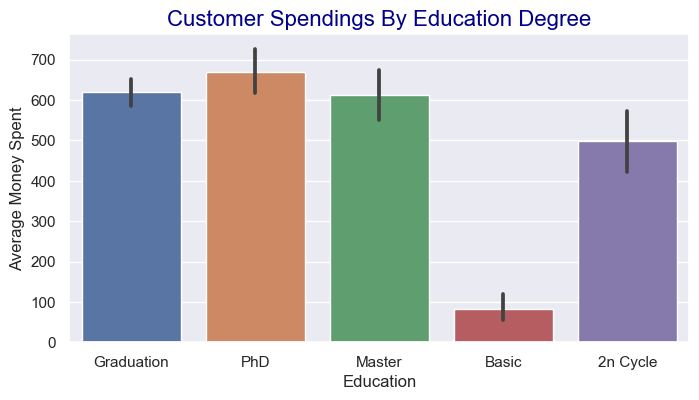

In [23]:
sb.set(style="darkgrid")
plt.figure(figsize=(8,4))
sb.barplot(data=df,y='Total_Spent', x='Education', palette='deep').set_title(label='Customer Spendings By Education Degree', fontsize=16, color='darkblue')
plt.ylabel('Average Money Spent')

Text(0, 0.5, 'Money Spent')

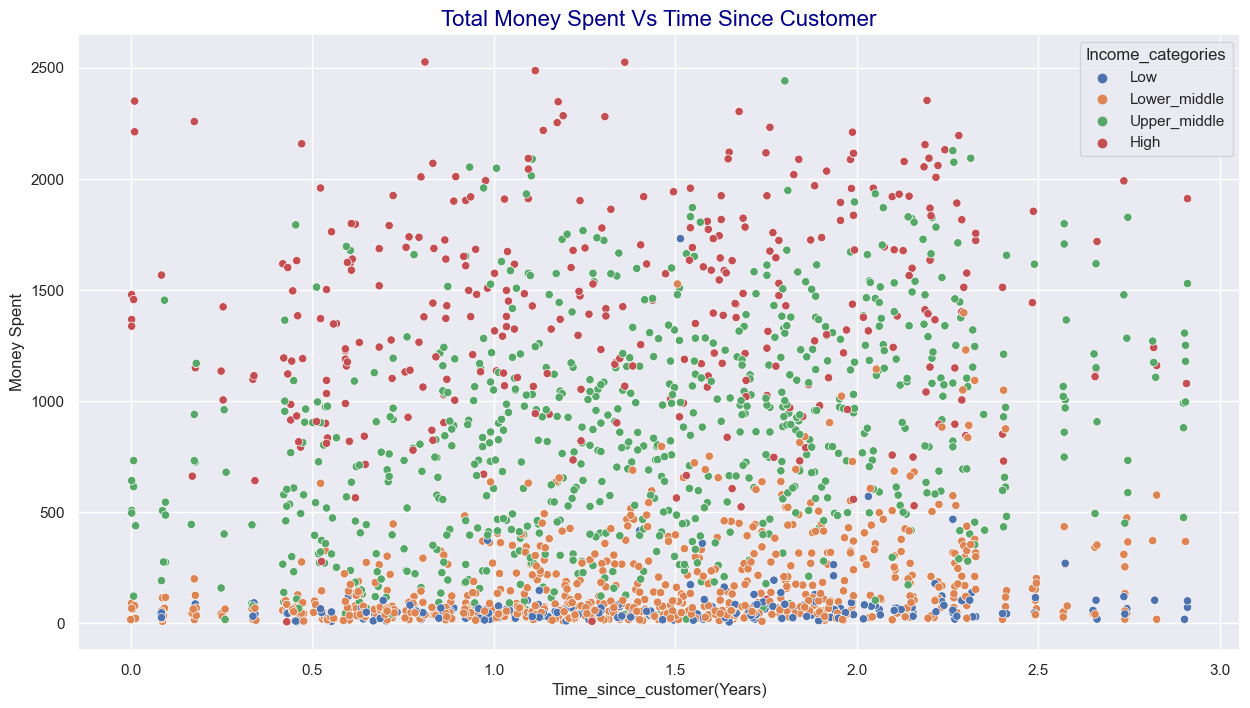

In [24]:
sb.set(style="darkgrid")
plt.figure(figsize=(15,8))
sb.scatterplot(data=df,y='Total_Spent', x='Time_since_customer(Years)', hue='Income_categories', palette='deep').set_title(label='Total Money Spent Vs Time Since Customer', fontsize=16, color='darkblue')
plt.ylabel('Money Spent')

Text(0, 0.5, 'Number of Web Visits Per Month')

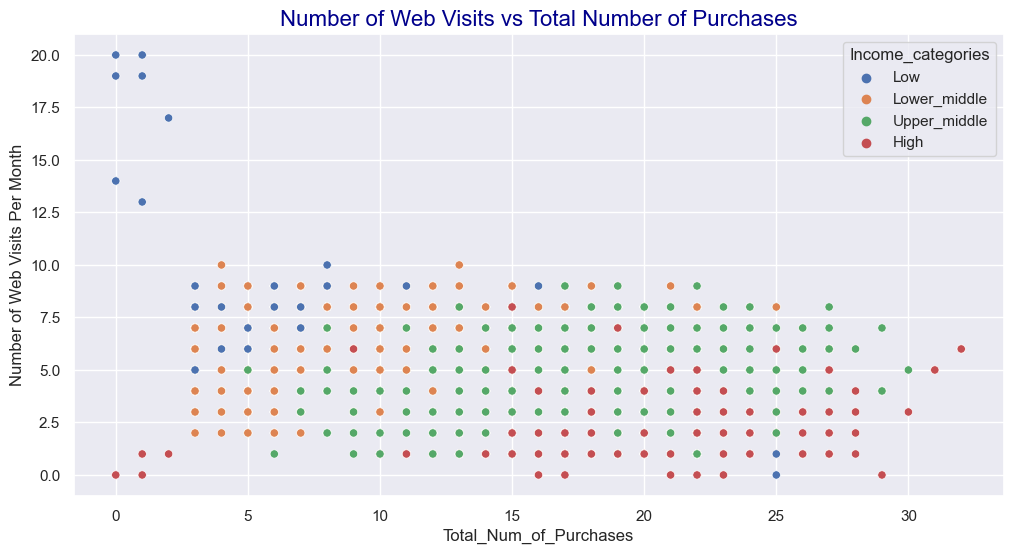

In [25]:
sb.set(style="darkgrid")
plt.figure(figsize=(12,6))
sb.scatterplot(data=df,y='NumWebVisitsMonth', x='Total_Num_of_Purchases', hue='Income_categories',palette={"Low":"C0","Lower_middle":"C1","Upper_middle":"C2","High":"C3"}).set_title(label='Number of Web Visits vs Total Number of Purchases', fontsize=16, color='darkblue')
plt.ylabel('Number of Web Visits Per Month')

Text(0, 0.5, 'Average number of Purcahses')

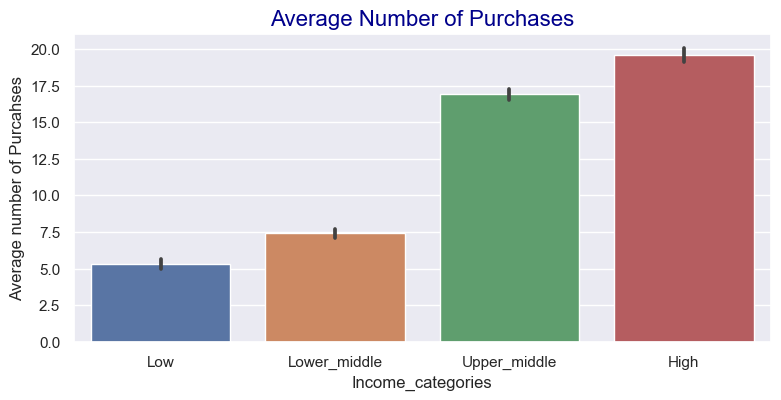

In [26]:
sb.set(style="darkgrid")
plt.figure(figsize=(9,4))
sb.barplot(data=df,y='Total_Num_of_Purchases', x='Income_categories', palette='deep', order=['Low','Lower_middle','Upper_middle','High']).set_title(label='Average Number of Purchases', fontsize=16, color='darkblue')
plt.ylabel('Average number of Purcahses')

Text(0.5, 0, 'Money Spent')

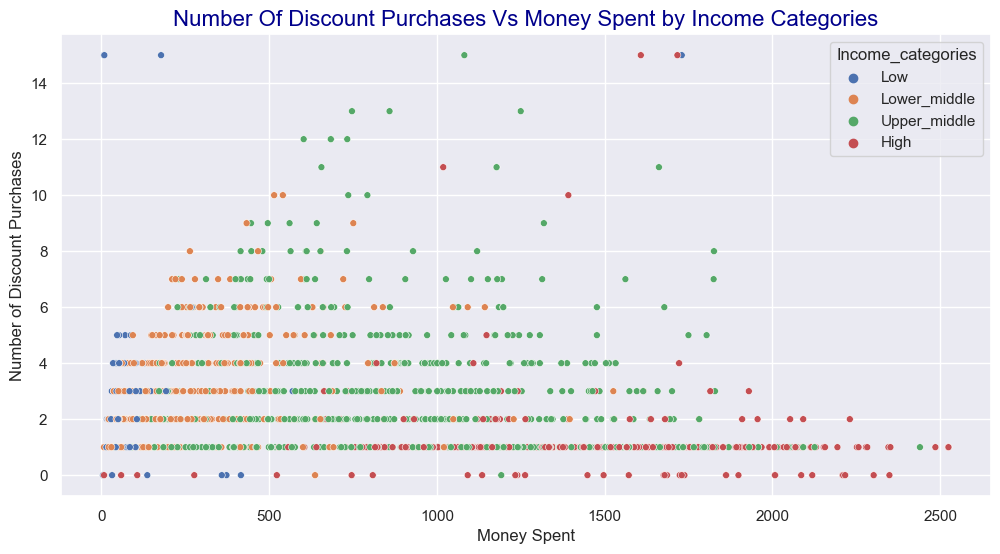

In [27]:
sb.set(style="darkgrid")
plt.figure(figsize=(12,6))
sb.scatterplot(data=df,y='NumDealsPurchases', x='Total_Spent', hue='Income_categories', palette='deep',s=25).set_title(label='Number Of Discount Purchases Vs Money Spent by Income Categories', fontsize=16, color='darkblue')
plt.ylabel('Number of Discount Purchases')
plt.xlabel('Money Spent')

Text(0, 0.5, 'Average Number of Discount Purchases')

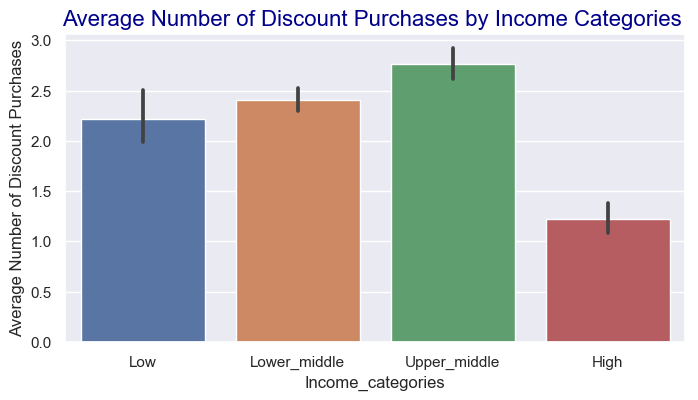

In [28]:
sb.set(style="darkgrid")
plt.figure(figsize=(8,4))
sb.barplot(data=df,y='NumDealsPurchases', x='Income_categories', palette='deep').set_title(label='Average Number of Discount Purchases by Income Categories ', fontsize=16, color='darkblue')
plt.ylabel('Average Number of Discount Purchases')

Text(0, 0.5, 'Web Monthly Visits')

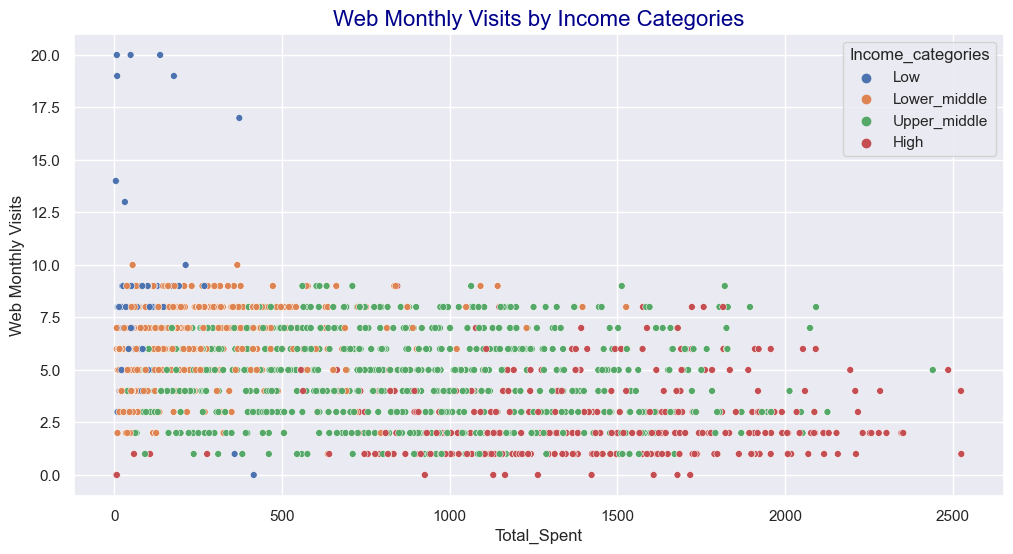

In [29]:
sb.set(style="darkgrid")
plt.figure(figsize=(12,6))
sb.scatterplot(data=df,y='NumWebVisitsMonth', x='Total_Spent', hue='Income_categories', palette='deep',s=25).set_title(label='Web Monthly Visits by Income Categories', fontsize=16, color='darkblue')
plt.ylabel('Web Monthly Visits')

Text(0, 0.5, 'Average Web Monthly Visits')

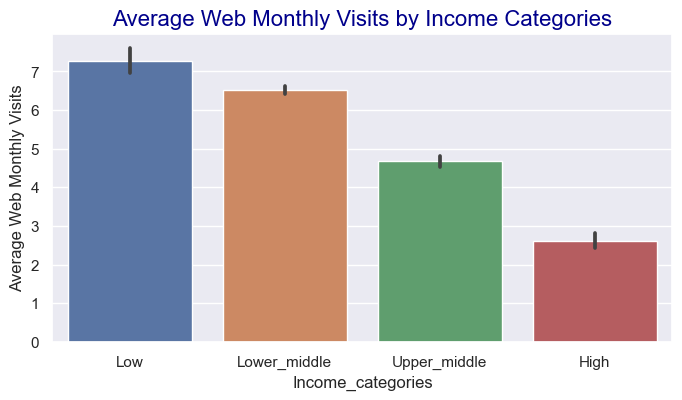

In [30]:
sb.set(style="darkgrid")
plt.figure(figsize=(8,4))
sb.barplot(data=df,y='NumWebVisitsMonth', x='Income_categories', palette='deep').set_title(label='Average Web Monthly Visits by Income Categories', fontsize=16, color='darkblue')
plt.ylabel('Average Web Monthly Visits')

There is no clear pattern in the total amount spent as the customer spends more years (as a customer). But as we can see the higher income the total_spent amount is more.

In [31]:
Product_sold_by_age=df[['MntWines','MntMeatProducts', 'MntSweetProducts','MntFishProducts', 'MntGoldProds','Age']]
Product_sold_by_age.groupby('Age').sum()

MntWines  MntMeatProducts  MntSweetProducts  MntFishProducts  \
Age                                                                 
18          3               16                25               18   
19       1421             1615               268              252   
20       1977             1776                79              336   
21       1956             1720               319              800   
22       3289             3674               424              476   
23       8238             5111               677              813   
24       3435             3840               369              550   
25       6237             4265               624             1048   
26       8742             7060              1220             1299   
27       7819             4861               897             1148   
28       8597             7747              1592             1332   
29       5190             3753               447              792   
30       6069             3877               951             1114   
31       9898             6709              1001             1076   
32      15477            10996              1383             2611   
33       9133             4171               676             1766   
34       8221             6741              1265             1233   
35      10167             8125              1520             2413   
36      14741            10852              1924             2138   
37      13228             8383              1069             1560   
38      23158            12151              1782             2730   
39      25183            10588              2766             3768   
40      16556             8269              1660             1861   
41      14995            10305              1242             1515   
42      22827            12682              1824             2551   
43      23111            11274              2285             2710   
44      26325            14791              2495             3464   
45      24178            12308              1619             2687   
46      13661             4652               840             1302   
47      13606             7218              1288             1458   
48      14218             8097              1074             1491   
49      23186            11416              2241             2395   
50      16702             6560              1232             1523   
51      13767             5603               896             1716   
52      18700             8538              1156             1985   
53      15994             6675              1039             1266   
54      15323             7971              1360             1902   
55      18391             8757              1591             2238   
56      19807            10233              1768             2255   
57      12606             8564              1210             1947   
58      18871            10919              1452             2471   
59      19763             7978              1282             1785   
60      20418             9244              1780             2495   
61      14247             6510               925             1379   
62      17156             8668              1227             1628   
63      13085             7831              1253             2067   
64       7116             2510               394              627   
65      15593             6498               843             1233   
66       9440             4545               985             1092   
67       7896             6571               571              615   
68       6911             2963               639             1143   
69       3564             2413               544              465   
70       3962             1924               249              447   
71       4446             2134               310              890   
73       1285              716                 0               55   
74        144                7                 0                0   
114

The high income class spends almost double the amount of all the classes combined.

Text(0.5, 1.0, 'Average Age of Income Categories')

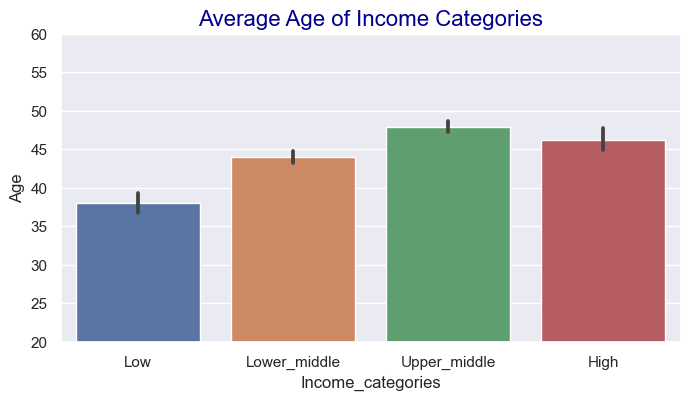

In [32]:
sb.set(style="darkgrid")
plt.figure(figsize=(8,4))
sb.barplot(data=df, y='Age',x='Income_categories').set(ylim=(20,60))
plt.title(label='Average Age of Income Categories', fontsize=16, color='darkblue')

Text(0, 0.5, 'Money Spent')

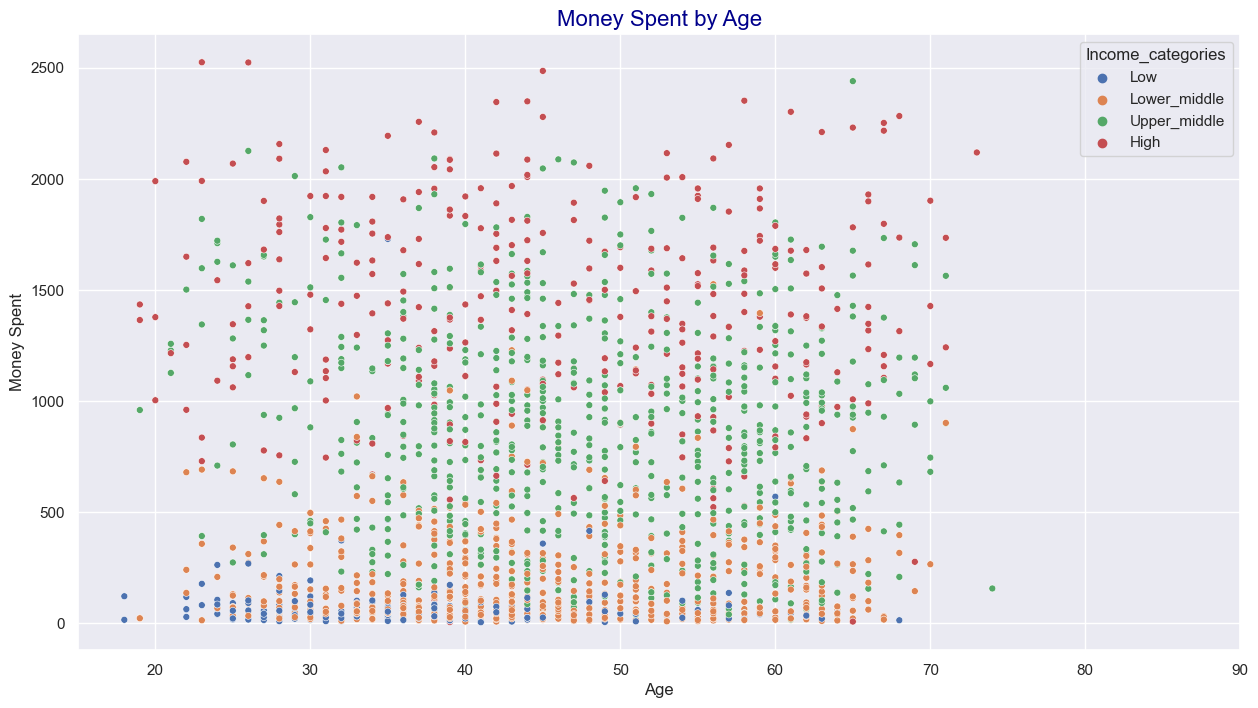

In [33]:
sb.set(style="darkgrid")
plt.figure(figsize=(15,8))
sb.scatterplot(data=df, x='Age',y='Total_Spent', hue='Income_categories', s=25).set(xlim=(15,90))
plt.title(label='Money Spent by Age', fontsize=16, color='darkblue')
plt.ylabel('Money Spent')

Most customers are in the range of 40 to 80 years old. There is no clear pattern in total money spent as the age increases. Low and lower_middle classes are on average younger in age tham upper_middle and high classes. 

Text(0, 0.5, 'Money Spent')

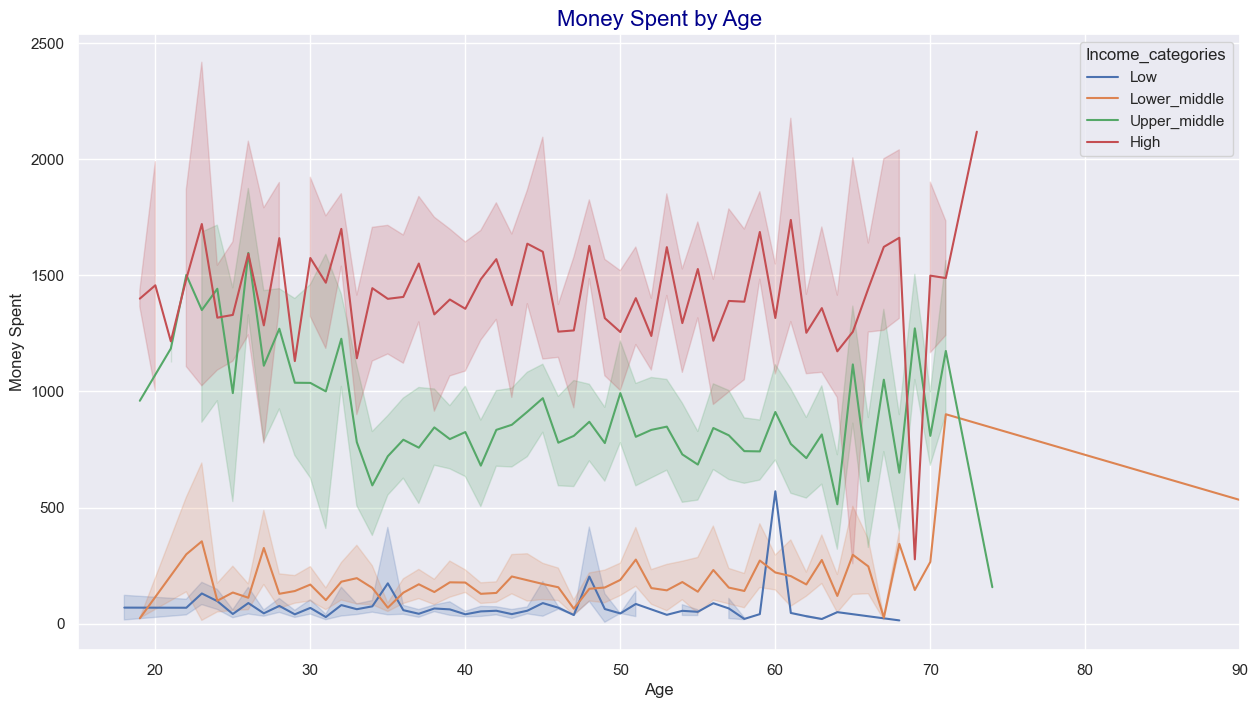

In [34]:
sb.set(style="darkgrid")
plt.figure(figsize=(15,8))
sb.lineplot(data=df, x='Age',y='Total_Spent', hue='Income_categories').set(xlim=(15,90))
plt.title(label='Money Spent by Age', fontsize=16, color='darkblue')
plt.ylabel('Money Spent')

Text(0, 0.5, 'Count')

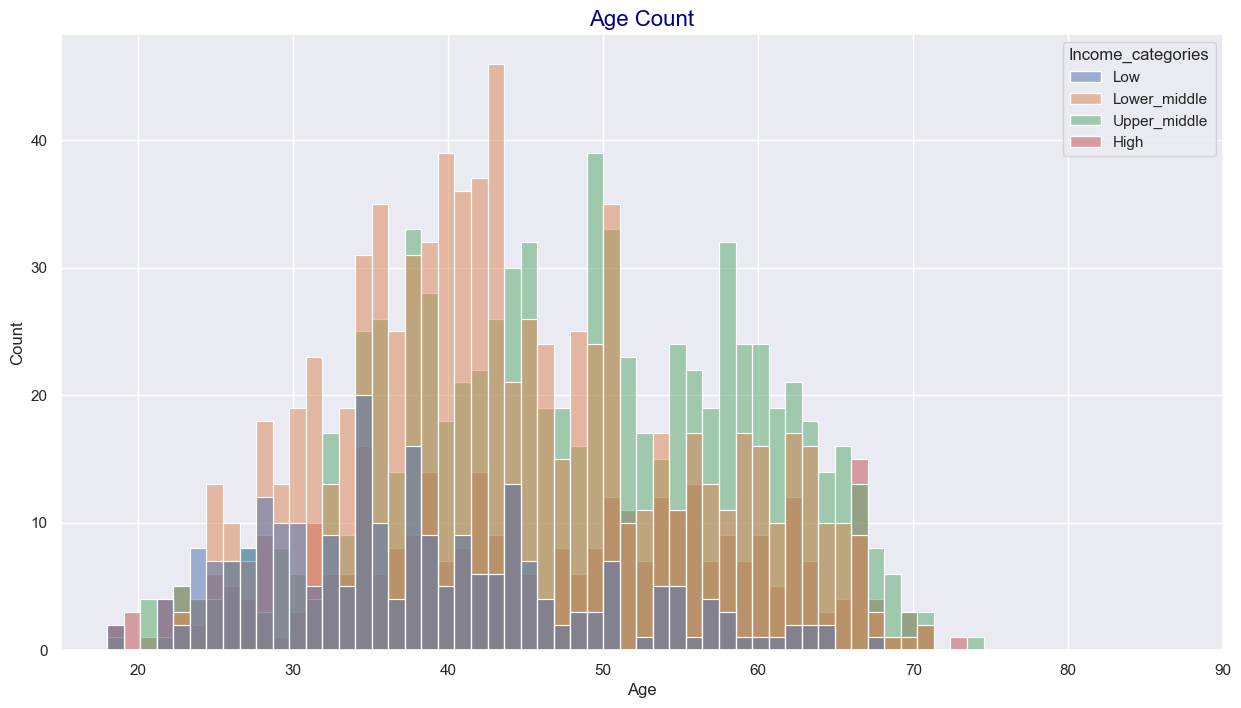

In [35]:
sb.set(style="darkgrid")
plt.figure(figsize=(15,8))
sb.histplot(data=df, x='Age', hue='Income_categories',bins=(90)).set(xlim=(15,90))
plt.title(label='Age Count', fontsize=16, color='darkblue')
plt.ylabel('Count')

In [36]:
Products_sold = df[['MntWines','MntMeatProducts', 'MntSweetProducts','MntFishProducts', 'MntGoldProds']]
Products_sold.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)
Product_sold_by_incomecat=df[['MntWines','MntMeatProducts', 'MntSweetProducts','MntFishProducts', 'MntGoldProds','Income_categories']]
Product_sold_by_incomecat.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)
Product_sold_by_incomecat.groupby(by='Income_categories').sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_21488\1109175702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Products_sold.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_21488\1109175702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Product_sold_by_incomecat.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)


Wine    Meat  Sweets   Fish   Gold
Income_categories                                      
Low                  2688    5251    1531   1910   4563
Lower_middle        70248   31287    6269   9703  19046
Upper_middle       371097  165674   28546  39386  49335
High               236011  171171   24210  32939  25427

In [37]:
products =pd.melt(Products_sold)

Text(0, 0.5, '')

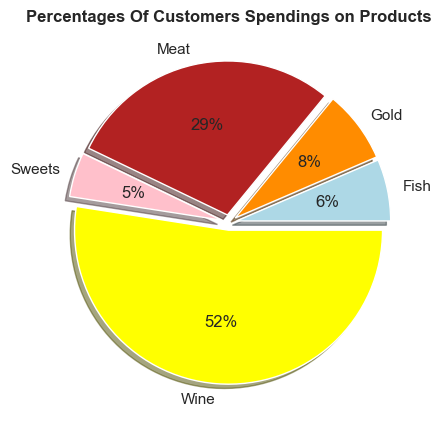

In [38]:
products.groupby('variable').sum().plot( kind='pie',figsize= (12,5), explode= [0.05,0.05,0.05,0.05,0.05], autopct='%1.0f%%', subplots=True, 
shadow=True, colors= ['lightblue','darkorange','firebrick', 'pink','yellow'], legend=None)
plt.title( label= 'Percentages Of Customers Spendings on Products',fontweight='bold')
plt.ylabel(None)


Text(0, 0.5, 'Totlal Money Spent')

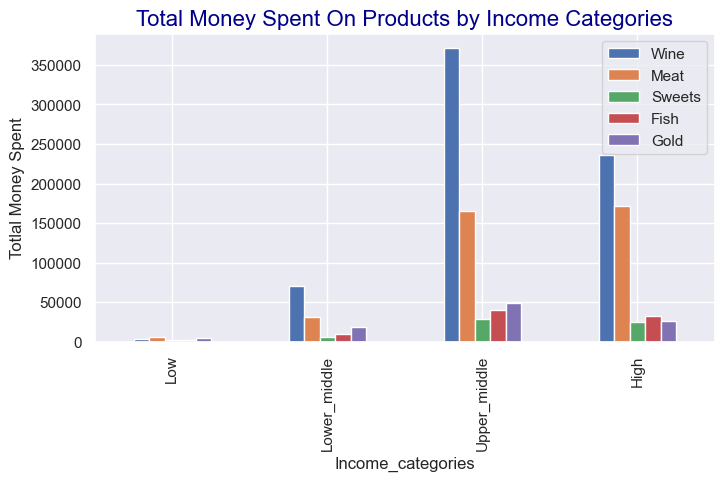

In [39]:

Product_sold_by_incomecat.groupby(by='Income_categories').sum().plot(kind='bar',figsize=(8,4)).set_title(label='Total Money Spent On Products by Income Categories', fontsize=16, color='darkblue')
plt.ylabel('Totlal Money Spent')

Text(0, 0.5, 'Average Customer Spendings')

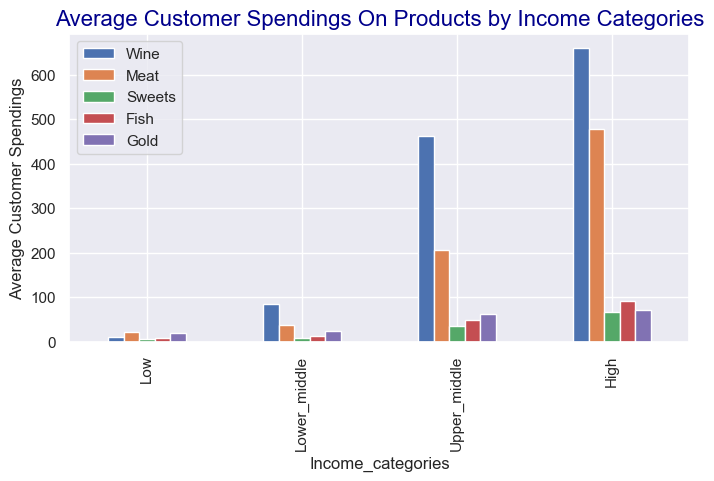

In [40]:

Product_sold_by_incomecat.groupby(by='Income_categories').mean().plot(kind='bar',figsize=(8,4)).set_title(label='Average Customer Spendings On Products by Income Categories', fontsize=16, color='darkblue')
plt.ylabel('Average Customer Spendings')

As we can see the most spent item in all income categories is by far the wine, then the meat. Rest of the categories is relatively close.

In [41]:
Product_sold_by_age=df[['MntWines','MntMeatProducts', 'MntSweetProducts','MntFishProducts', 'MntGoldProds','Age']]
Product_sold_by_age.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)
Product_sold_by_age.groupby('Age').sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_21488\3464483360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Product_sold_by_age.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)


Wine   Meat  Sweets  Fish  Gold
Age                                  
18       3     16      25    18    58
19    1421   1615     268   252   151
20    1977   1776      79   336   104
21    1956   1720     319   800   729
22    3289   3674     424   476   605
23    8238   5111     677   813  1226
24    3435   3840     369   550   735
25    6237   4265     624  1048  1087
26    8742   7060    1220  1299  1306
27    7819   4861     897  1148  1091
28    8597   7747    1592  1332  1707
29    5190   3753     447   792   895
30    6069   3877     951  1114  1972
31    9898   6709    1001  1076  1521
32   15477  10996    1383  2611  2135
33    9133   4171     676  1766  1271
34    8221   6741    1265  1233  1410
35   10167   8125    1520  2413  2298
36   14741  10852    1924  2138  3146
37   13228   8383    1069  1560  2351
38   23158  12151    1782  2730  3325
39   25183  10588    2766  3768  3433
40   16556   8269    1660  1861  1812
41   14995  10305    1242  1515  2286
42   22827  12682    1824  2551  3720
43   23111  11274    2285  2710  2853
44   26325  14791    2495  3464  3634
45   24178  12308    1619  2687  3155
46   13661   4652     840  1302  2366
47   13606   7218    1288  1458  1662
48   14218   8097    1074  1491  2208
49   23186  11416    2241  2395  3414
50   16702   6560    1232  1523  1878
51   13767   5603     896  1716  2617
52   18700   8538    1156  1985  2917
53   15994   6675    1039  1266  1172
54   15323   7971    1360  1902  1905
55   18391   8757    1591  2238  2044
56   19807  10233    1768  2255  2775
57   12606   8564    1210  1947  1964
58   18871  10919    1452  2471  2458
59   19763   7978    1282  1785  2567
60   20418   9244    1780  2495  2650
61   14247   6510     925  1379  1748
62   17156   8668    1227  1628  3016
63   13085   7831    1253  2067  3083
64    7116   2510     394   627   915
65   15593   6498     843  1233  1193
66    9440   4545     985  1092  1181
67    7896   6571     571   615   790
68    6911   2963     639  1143   817
69    3564   2413     544   465   527
70    3962   1924     249   447   143
71    4446   2134     310   890   293
73    1285    716       0    55    21
74     144      7       0     0     6
114     15      8       4     7    25

In [42]:
pd.melt(Product_sold_by_age, id_vars='Age')

Age variable  value
0       57     Wine    635
1       60     Wine     11
2       49     Wine    426
3       30     Wine     11
4       33     Wine    173
...    ...      ...    ...
11180   47     Gold    247
11181   68     Gold      8
11182   33     Gold     24
11183   58     Gold     61
11184   60     Gold     21

[11185 rows x 3 columns]

Text(0, 0.5, 'Money Spent')

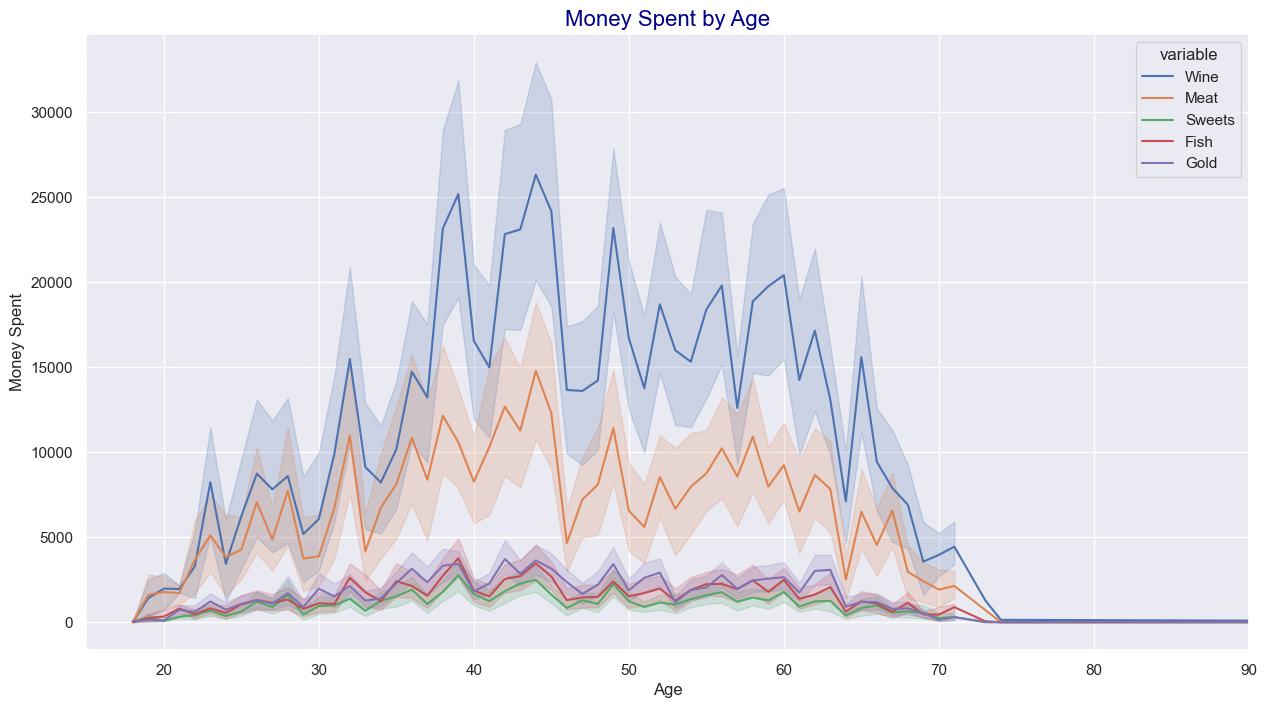

In [43]:
sb.set(style="darkgrid")
plt.figure(figsize=(15,8))
sb.lineplot(data=pd.melt(Product_sold_by_age, id_vars='Age'), x='Age',y='value', hue='variable', estimator=sum).set(xlim=(15,90))
plt.title(label='Money Spent by Age', fontsize=16, color='darkblue')
plt.ylabel('Money Spent')

In [44]:
Product_sold_by_status=df[['MntWines','MntMeatProducts', 'MntSweetProducts','MntFishProducts', 'MntGoldProds','Marital_Status']]
Product_sold_by_status.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)
Product_sold_by_status.groupby('Marital_Status').sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_21488\4257194146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Product_sold_by_status.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)


Wine    Meat  Sweets   Fish   Gold
Marital_Status                                      
Absurd             711     625      61    411    408
Alone              554      79      21     23     81
Divorced         75364   34848    6222   8130  10739
Married         258751  138829   23070  30569  36999
Single          138391   87407   13086  18337  20988
Together        177195   96920   15086  22503  24701
Widow            28434   14575    3004   3957   4371
YOLO               644     100       6      8     84

<Figure size 800x400 with 0 Axes>

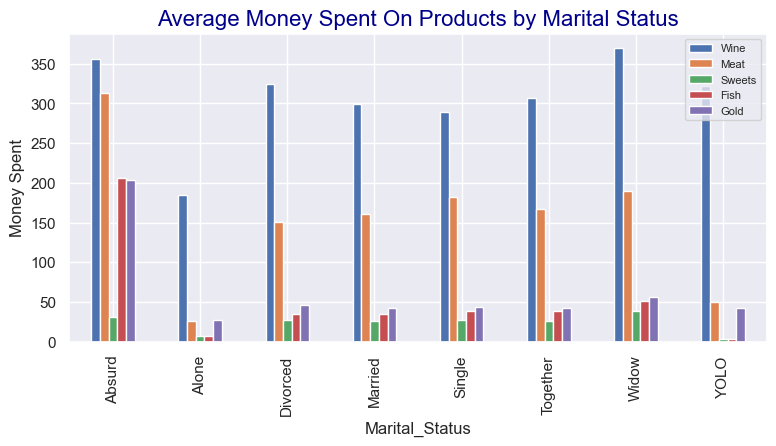

In [45]:
plt.figure(figsize=(8,4))
Product_sold_by_status.groupby(by='Marital_Status').mean().plot(kind='bar',figsize=(9,4)).set_title(label='Average Money Spent On Products by Marital Status', fontsize=16, color='darkblue')
plt.ylabel('Money Spent')
plt.legend(fontsize=8)

In [46]:
Product_sold_by_children=df[['MntWines','MntMeatProducts', 'MntSweetProducts','MntFishProducts', 'MntGoldProds','children_home']]
Product_sold_by_children.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)
Product_sold_by_children.groupby('children_home').sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_21488\283681329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Product_sold_by_children.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)


Wine    Meat  Sweets   Fish   Gold
children_home                                      
0              310146  237163   33789  48733  40703
1              301205  111230   22892  30036  45980
2               59610   21597    3524   4794  10702
3                9083    3393     351    375    986

Text(0, 0.5, 'Money Spent')

<Figure size 1500x800 with 0 Axes>

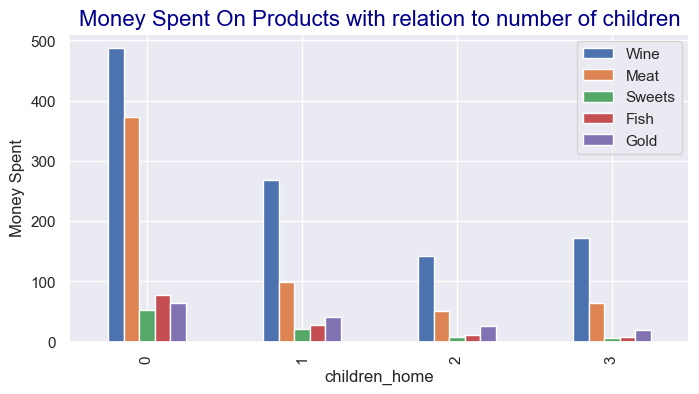

In [47]:
plt.figure(figsize=(15,8))
Product_sold_by_children.groupby(by='children_home').mean().plot(kind='bar',figsize=(8,4)).set_title(label='Money Spent On Products with relation to number of children', fontsize=16, color='darkblue')
plt.ylabel('Money Spent')

In [48]:
Product_sold_by_education=df[['MntWines','MntMeatProducts', 'MntSweetProducts','MntFishProducts', 'MntGoldProds','Education']]
Product_sold_by_education.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)
Product_sold_by_education.groupby('Education').sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_21488\2568808589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Product_sold_by_education.rename(columns={'MntWines':'Wine', 'MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntFishProducts':'Fish', 'MntGoldProds':'Gold' },inplace=True)


Wine    Meat  Sweets   Fish   Gold
Education                                       
2n Cycle     40223   28670    6953   9632   9417
Basic          391     618     654    921   1233
Graduation  320362  202266   35350  48622  57295
Master      123238   60450    7835  11877  14947
PhD         195830   81379    9764  12886  15479

Text(0, 0.5, 'Money Spent')

<Figure size 1500x800 with 0 Axes>

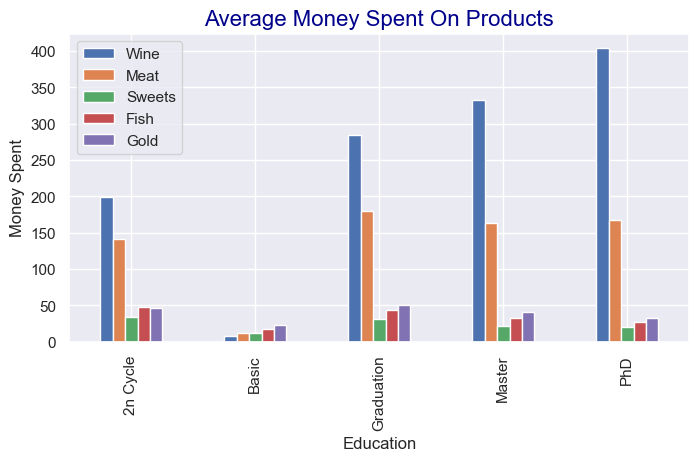

In [49]:
plt.figure(figsize=(15,8))
Product_sold_by_education.groupby(by='Education').mean().plot(kind='bar',figsize=(8,4)).set_title(label='Average Money Spent On Products', fontsize=16, color='darkblue')
plt.ylabel('Money Spent')

In [50]:
Purchase_Type = df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']]
Purchase_Type.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store' },inplace=True)
Purchase_Type_income=df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','Income_categories']]
Purchase_Type_income.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store' },inplace=True)
Purchase_Type_income.groupby('Income_categories').sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_21488\1059596265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Purchase_Type.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store' },inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_21488\1059596265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Purchase_Type_income.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store' },inplace=True)


Web  Catalog  Store
Income_categories                      
Low                 493      127    662
Lower_middle       2348      720   3109
Upper_middle       4437     2925   6233
High               1864     2184   2957

In [51]:
purchase = pd.melt(Purchase_Type)

Text(0, 0.5, '')

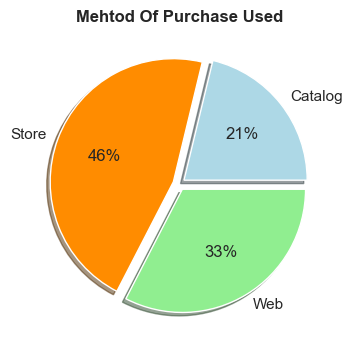

In [52]:
purchase.groupby('variable').sum().plot( kind='pie',figsize= (8,4), explode= [0.05,0.05,0.05], autopct='%1.0f%%', subplots=True, 
shadow=True, colors= ['lightblue','darkorange','lightgreen'], legend=None)
plt.title( label= 'Mehtod Of Purchase Used',fontweight='bold')
plt.ylabel(None)

Text(0, 0.5, 'Number of Purchases')

<Figure size 1000x500 with 0 Axes>

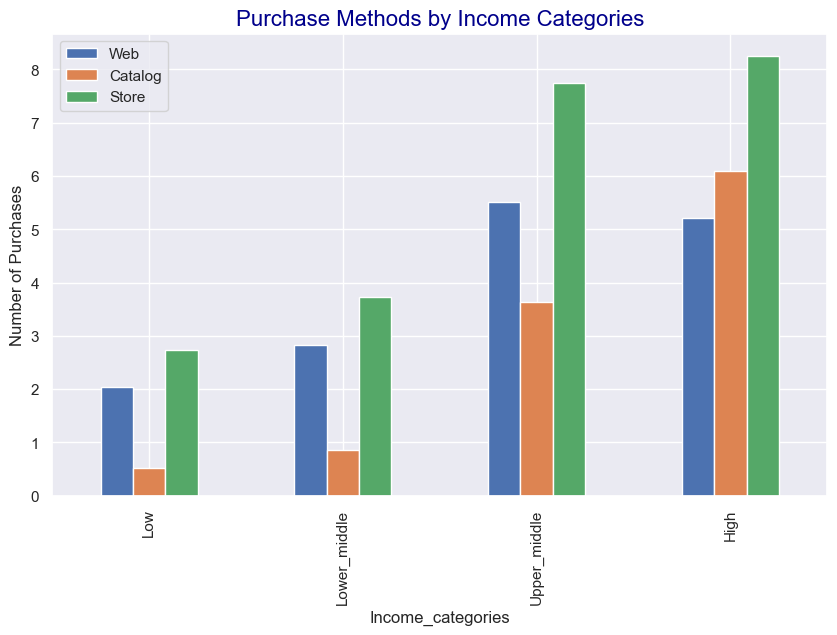

In [53]:
plt.figure(figsize=(10,5))
Purchase_Type_income.groupby(by='Income_categories').mean().plot(kind='bar',figsize=(10,6)).set_title(label='Purchase Methods by Income Categories', fontsize=16, color='darkblue')
plt.ylabel('Number of Purchases')

In [54]:
Purchase_Type_Eduction=df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','Education']]
Purchase_Type_Eduction.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store' },inplace=True)
Purchase_Type_Eduction.groupby('Education').sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_21488\3561919152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Purchase_Type_Eduction.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store' },inplace=True)


Web  Catalog  Store
Education                       
2n Cycle     756      471   1116
Basic        102       26    154
Graduation  4646     3071   6567
Master      1492      951   2182
PhD         2146     1437   2942

Text(0, 0.5, 'Number of Purchases')

<Figure size 1500x800 with 0 Axes>

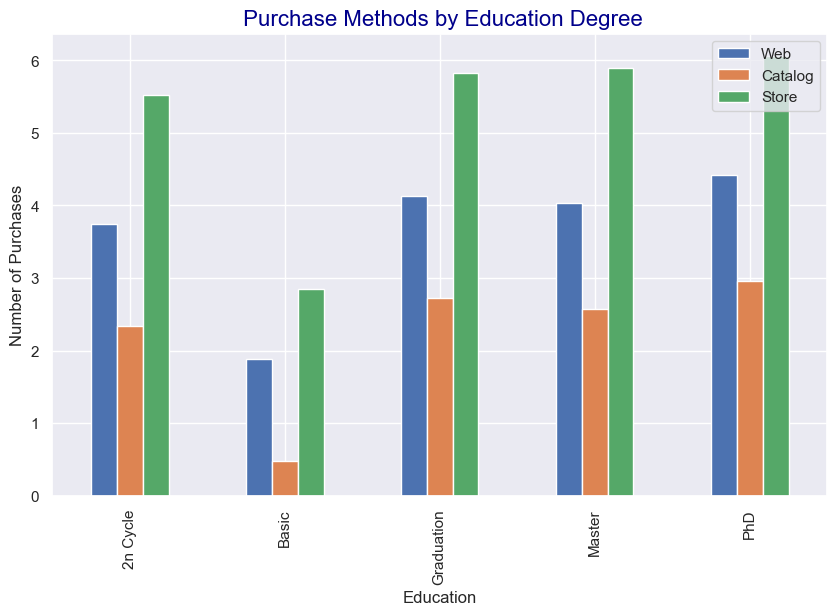

In [55]:
plt.figure(figsize=(15,8))
Purchase_Type_Eduction.groupby(by='Education').mean().plot(kind='bar',figsize=(10,6)).set_title(label=' Purchase Methods by Education Degree', fontsize=16, color='darkblue')
plt.ylabel('Number of Purchases')

In [56]:
Purchase_Type_Age=df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','Age']]
Purchase_Type_Age.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store' },inplace=True)
Purchase_Type_Age.groupby('Age').sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_21488\2718744959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Purchase_Type_Age.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store' },inplace=True)


Web  Catalog  Store
Age                     
18     4        1      5
19    14       24     36
20    15       14     28
21    22       34     29
22    41       44     67
23    61       67    102
24    62       36     84
25    85       64    175
26    99       82    168
27    90       76    163
28   157       72    199
29    91       43    163
30   116       69    165
31   135       73    194
32   178      156    244
33   157       73    209
34   154       83    207
35   196      130    301
36   270      143    407
37   204      142    263
38   339      194    491
39   331      213    474
40   271      128    382
41   260      158    336
42   314      179    435
43   331      195    464
44   310      213    463
45   311      200    410
46   236      100    291
47   194      110    264
48   215      106    289
49   344      186    438
50   187      145    257
51   185      138    252
52   197      143    311
53   168       94    232
54   180      157    327
55   221      157    303
56   225      183    334
57   182      122    231
58   273      170    383
59   242      164    325
60   244      164    311
61   158      117    206
62   208      172    341
63   199      120    280
64   104       66    152
65   150      108    211
66    91      102    130
67    76       63    125
68    84       48    121
69    66       30     52
70    40       32     58
71    43       41     62
73     7       10      5
74     3        1      4
114    2        1      2

In [57]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  AcceptedCmp6  \
0             0             0             0             0             1   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Total_Spent  Total_Num_of_Purchases  children_home  Age  \
0         1617                      22              0   57   
1           27                       4              2   60   
2          776                      20              0   49   
3           53                       6              1   30   
4          422                      14              1   33   

   Time_since_customer(Years) Income_categories  
0                    2.658508      Upper_middle  
1                    0.342238      Lower_middle  
2                    1.292292      Upper_middle  
3                    0.177964      Lower_middle  
4                    0.878868      Upper_middle

In [58]:
Offer_Camps = df[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp6']]
Offer_Camps.rename(columns={'AcceptedCmp1':' Camp1', 'AcceptedCmp2':'Camp2','AcceptedCmp3':'Camp3', 'AcceptedCmp4':'Camp4', 'AcceptedCmp5':'Camp5', 'AcceptedCmp6':'Camp6' },inplace=True)
Offer_Camps_Inncome = df[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp6','Income_categories']]
Offer_Camps_Inncome.rename(columns={'AcceptedCmp1':' Camp1', 'AcceptedCmp2':'Camp2','AcceptedCmp3':'Camp3', 'AcceptedCmp4':'Camp4', 'AcceptedCmp5':'Camp5', 'AcceptedCmp6':'Camp6' },inplace=True)
Offer_Camps_Inncome.groupby('Income_categories').sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_21488\403558095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Offer_Camps.rename(columns={'AcceptedCmp1':' Camp1', 'AcceptedCmp2':'Camp2','AcceptedCmp3':'Camp3', 'AcceptedCmp4':'Camp4', 'AcceptedCmp5':'Camp5', 'AcceptedCmp6':'Camp6' },inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_21488\403558095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Offer_Camps_Inncome.rename(columns={'AcceptedCmp1':' Camp1', 'AcceptedCmp2':'Camp2','AcceptedCmp3':'Camp3', 'AcceptedCmp4':'Camp4', 'AcceptedCmp5':'Camp5', 'AcceptedCmp6':'Camp6' },inplace=True)


Camp1  Camp2  Camp3  Camp4  Camp5  Camp6
Income_categories                                           
Low                     0      0     20      0      0     26
Lower_middle            3      4     69     17      0     98
Upper_middle           42     12     41     90     29     91
High                   99     14     33     60    133    119

In [59]:
offer=pd.melt(Offer_Camps)

Text(0.5, 0, 'Offer_Camp')

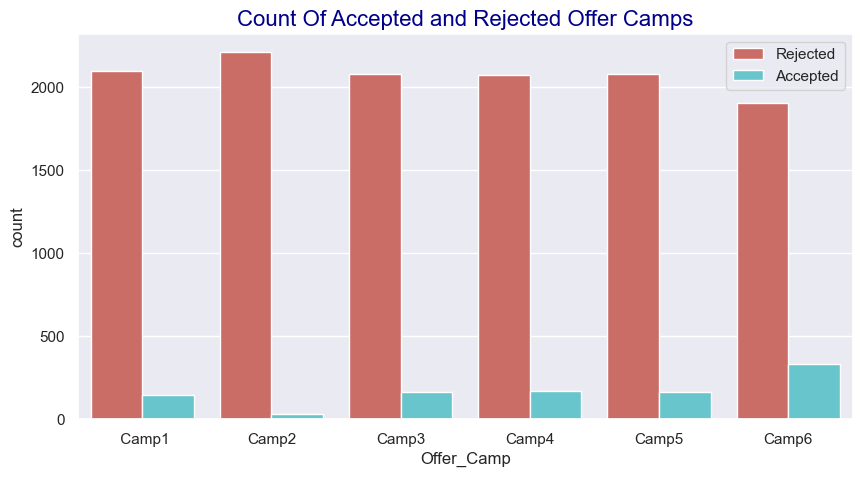

In [60]:
plt.figure(figsize=(10,5))
sb.countplot(data=offer,x='variable', hue='value', palette='hls').set_title(label='Count Of Accepted and Rejected Offer Camps', fontsize=16, color='darkblue')
plt.legend(labels=['Rejected', 'Accepted'])
plt.xlabel('Offer_Camp')

Text(0, 0.5, 'Percentage Accepted')

<Figure size 1000x500 with 0 Axes>

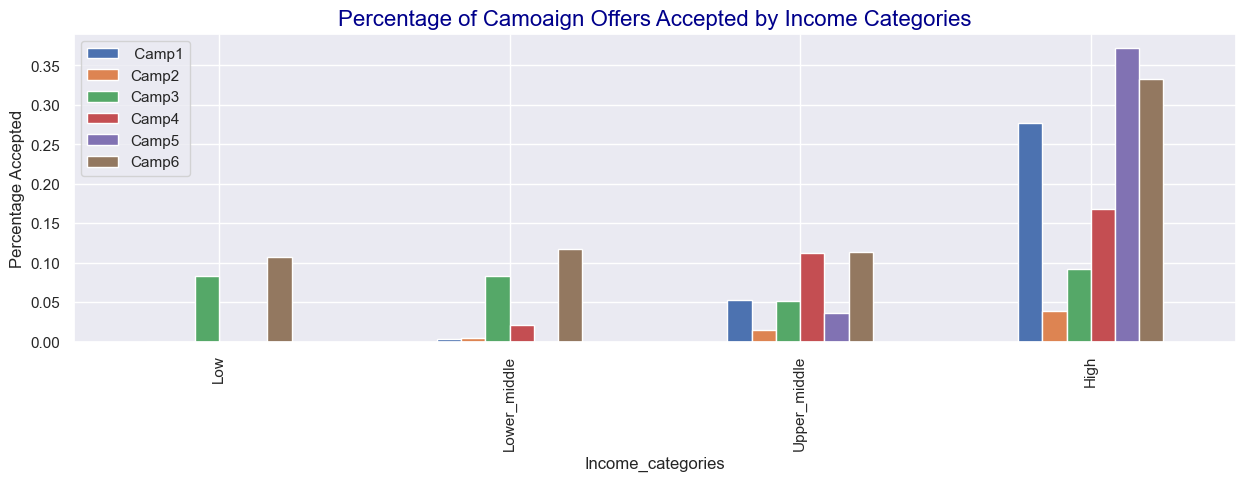

In [61]:
plt.figure(figsize=(10,5))
Offer_Camps_Inncome.groupby(by='Income_categories').mean().plot(kind='bar',figsize=(15,4)).set_title(label='Percentage of Camoaign Offers Accepted by Income Categories', fontsize=16, color='darkblue')
plt.ylabel('Percentage Accepted')

In [62]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  AcceptedCmp6  \
0             0             0             0             0             1   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Total_Spent  Total_Num_of_Purchases  children_home  Age  \
0         1617                      22              0   57   
1           27                       4              2   60   
2          776                      20              0   49   
3           53                       6              1   30   
4          422                      14              1   33   

   Time_since_customer(Years) Income_categories  
0                    2.658508      Upper_middle  
1                    0.342238      Lower_middle  
2                    1.292292      Upper_middle  
3                    0.177964      Lower_middle  
4                    0.878868      Upper_middle

# Customer Clustering Using Statistical Methods


## Clustering Method 1
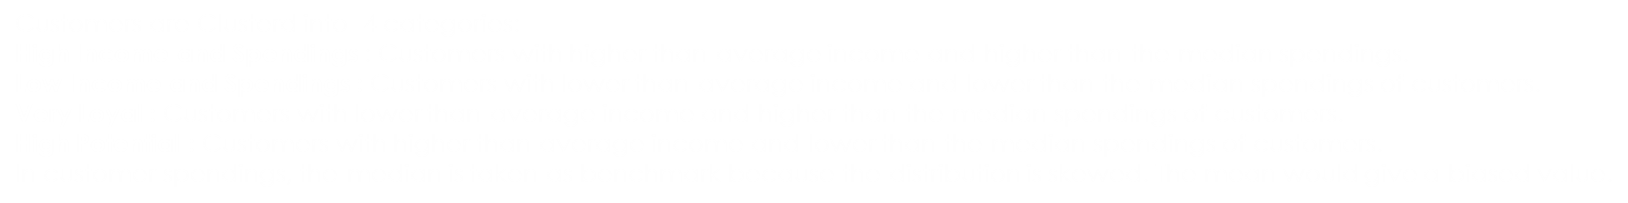

In [63]:
print('Median',df['Total_Spent'].median())
print('Mean',df['Total_Spent'].mean())

Median 396.0
Mean 605.7447474295932


In [116]:
df['ratio']= df['Total_Spent']/(df['Income']/100)

In [123]:
df['ratio'].describe()

count    2237.000000
mean        0.989550
std         1.675101
min         0.003898
25%         0.234637
50%         0.795863
75%         1.551798
max        70.698815
Name: ratio, dtype: float64

In [144]:
def Classify_Customer(dfrow):
    
#  This function classifies the customers into 4 categories.

    if (dfrow['Income'] >= 50000) and (dfrow['Total_Spent'] >= 396):
        result = 'High Income and Spending'
    elif (dfrow['Income'] >= 50000) and (dfrow['Total_Spent'] < 396):
        result = 'High Potential'
    elif (dfrow['Income'] < 50000) and (dfrow['Total_Spent'] >= 396):
        result = 'Very Loyal'
    elif (dfrow['Income'] < 50000) and (dfrow['Total_Spent'] < 396):
        result = 'Low income and Spending'
    return result

In [145]:
df['Customer_Classification'] = df.apply(Classify_Customer, axis=1)
df.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  AcceptedCmp6  \
0             0             0             0             0             1   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Total_Spent  Total_Num_of_Purchases  children_home  Age  \
0         1617                      22              0   57   
1           27                       4              2   60   
2          776                      20              0   49   
3           53                       6              1   30   
4          422                      14              1   33   

   Time_since_customer(Years) Income_categories   Customer_Classification  \
0                    2.658508      Upper_middle  High Income and Spending   
1                    0.342238      Lower_middle   Low income and Spending   
2                    1.292292      Upper_middle  High Income and Spending   
3                    0.177964      Lower_middle   Low income and Spending   
4                    0.878868      Upper_middle  High Income and Spending   

      ratio          Customer_Classification2  
0  2.781313  High Income and  Loyal Customers  
1  0.058260           Low income and Spending  
2  1.083602     High Income Moderate Spending  
3  0.198904           Low income and Spending  
4  0.723929     High Income Moderate Spending

Text(0, 0.5, ' Money Spent')

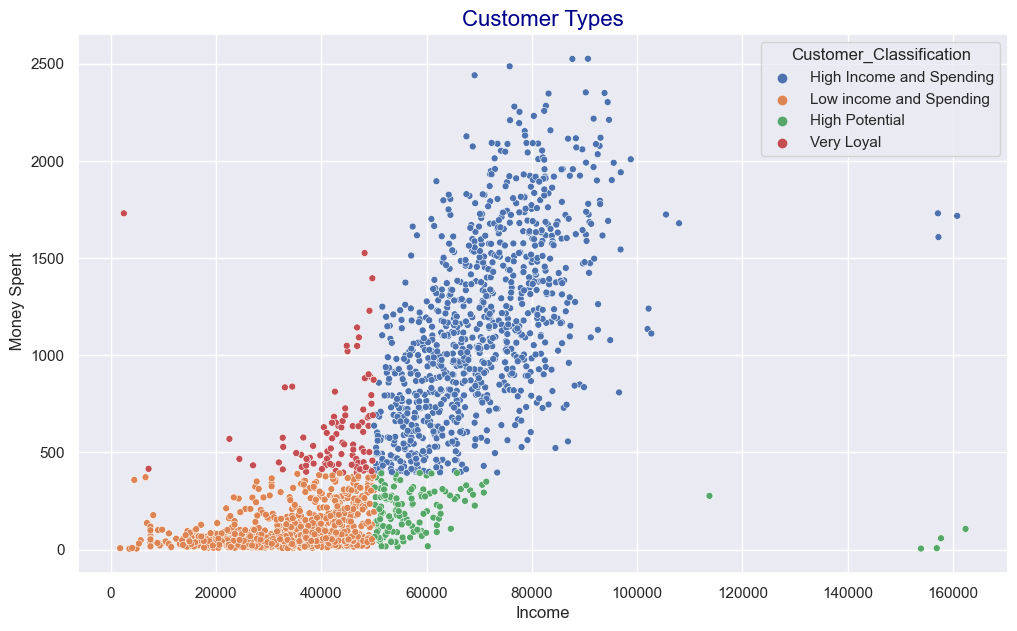

In [66]:
sb.set(style="darkgrid")
plt.figure(figsize=(12,7))
sb.scatterplot(data=df,x='Income',y='Total_Spent', hue='Customer_Classification', palette='deep', s=25).set_title(label='Customer Types', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')

Text(0, 0.5, '')

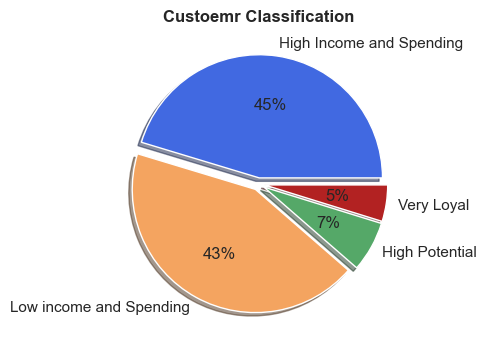

In [67]:
df['Customer_Classification'].value_counts().plot( kind='pie',figsize= (7,4), explode= [0.05,0.05,0.05,0.05], autopct='%1.0f%%', 
shadow=True, colors= ['royalblue','sandybrown','g', 'firebrick'])
plt.title( label= 'Custoemr Classification',fontweight='bold')
plt.ylabel(None)

In [223]:
df_summary_MA1 = df.groupby('Customer_Classification').agg(
    {
        'Total_Spent': 'mean',
        'Income':'mean',
        'Total_Num_of_Purchases': 'mean',
        'Age': 'mean',
        'children_home': lambda x: x.value_counts().index[0],
        'Education': lambda x: x.value_counts().index[0],
        'Marital_Status': lambda x: x.value_counts().index[0],
    }
)
df_summary_MA1

Total_Spent        Income  Total_Num_of_Purchases  \
Customer_Classification                                                       
High Income and Spending  1149.793886  70398.612310               19.056213   
High Potential             198.216216  59376.067932                8.628378   
Low income and Spending     98.063017  32536.046627                5.915289   
Very Loyal                 606.532710  42497.519065               16.196262   

                                Age  children_home   Education Marital_Status  
Customer_Classification                                                        
High Income and Spending  47.136095              0  Graduation        Married  
High Potential            49.439189              1  Graduation        Married  
Low income and Spending   42.349174              1  Graduation        Married  
Very Loyal                45.373832              1  Graduation        Married

C:\Users\HP\AppData\Local\Temp\ipykernel_21488\1211621489.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sb.stripplot(data=df,y='Total_Spent', x='Customer_Classification', palette='deep', s=4).set_title(label='Average Money Spent', fontsize=16, color='darkblue')


Text(0, 0.5, ' Money Spent')

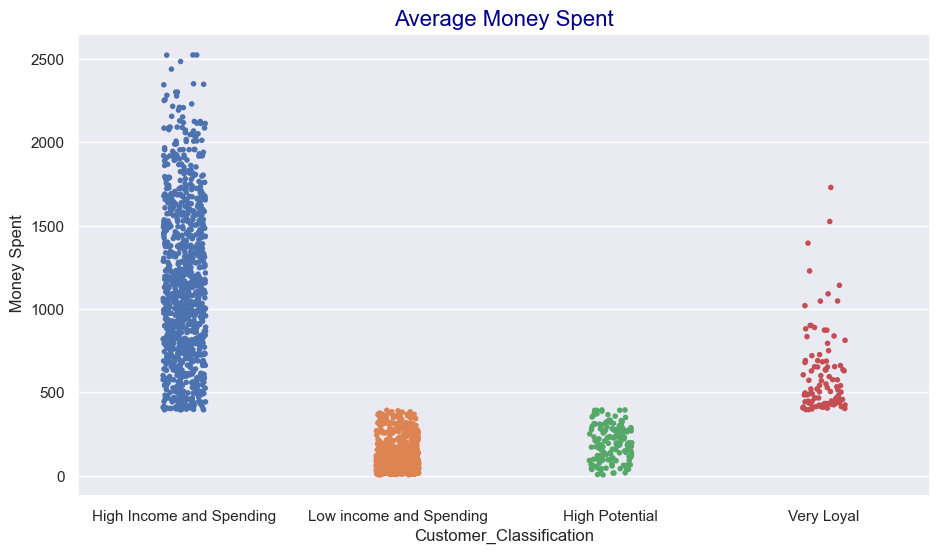

In [68]:
sb.set(style="darkgrid")
plt.figure(figsize=(11,6))
sb.stripplot(data=df,y='Total_Spent', x='Customer_Classification', palette='deep', s=4).set_title(label='Average Money Spent', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')

Text(0, 0.5, 'Average number')

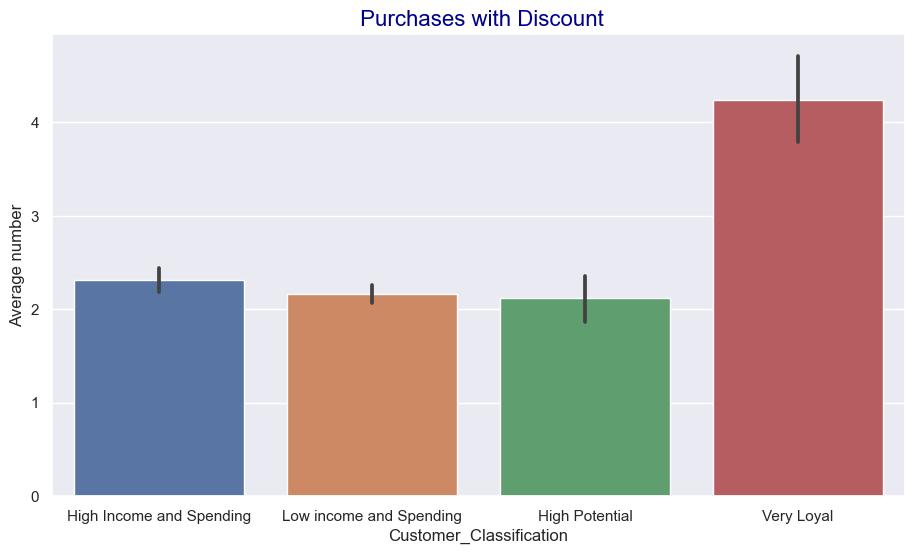

In [69]:
sb.set(style="darkgrid")
plt.figure(figsize=(11,6))
sb.barplot(data=df,y='NumDealsPurchases', x='Customer_Classification', palette='deep').set_title(label=' Purchases with Discount', fontsize=16, color='darkblue')
plt.ylabel('Average number')

## Clustering Method 2
In this method, instead of classifying customers based only on the median and mode, we will use the ratio between the income and spendings in addition to the mean income to classify customers.

In [136]:
dfhigh = df.query("Income > 50000")
dfhigh['ratio'].describe()

count    1162.000000
mean        1.449786
std         0.663742
min         0.003898
25%         0.985722
50%         1.470524
75%         1.926752
max         3.531217
Name: ratio, dtype: float64

In [207]:
dflow = df.query("Income <= 50000")
dflow['Total_Spent'].describe()

count    1075.000000
mean      148.673488
std       191.663147
min         5.000000
25%        40.500000
50%        69.000000
75%       179.000000
max      1730.000000
Name: Total_Spent, dtype: float64

In [217]:
def Classify_Customer2(dfrow):
    
#  This function classifies the customers into 4 categories.

    if (dfrow['Income'] >= 50000) and (dfrow['Total_Spent'] >= 396) and (dfrow['ratio'] >= 1.45):
        result = 'Loyal High Income'
    elif (dfrow['Income'] >= 50000) and (dfrow['ratio'] < 1.45):
        result = 'High Potential'
    elif (dfrow['Income'] < 50000) and (dfrow['Total_Spent'] >= dflow['Total_Spent'].mean()):
        result = 'Loyal Low income'
    elif (dfrow['Income'] < 50000) and (dfrow['Total_Spent'] < dflow['Total_Spent'].mean()):
        result = 'Low income and Spending'
    return result

In [218]:
df['Customer_Classification2'] = df.apply(Classify_Customer2, axis=1)
df.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  AcceptedCmp6  \
0             0             0             0             0             1   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Total_Spent  Total_Num_of_Purchases  children_home  Age  \
0         1617                      22              0   57   
1           27                       4              2   60   
2          776                      20              0   49   
3           53                       6              1   30   
4          422                      14              1   33   

   Time_since_customer(Years) Income_categories   Customer_Classification  \
0                    2.658508      Upper_middle  High Income and Spending   
1                    0.342238      Lower_middle   Low income and Spending   
2                    1.292292      Upper_middle  High Income and Spending   
3                    0.177964      Lower_middle   Low income and Spending   
4                    0.878868      Upper_middle  High Income and Spending   

      ratio Customer_Classification2  
0  2.781313        Loyal High Income  
1  0.058260  Low income and Spending  
2  1.083602           High Potential  
3  0.198904  Low income and Spending  
4  0.723929           High Potential

Text(0, 0.5, ' Money Spent')

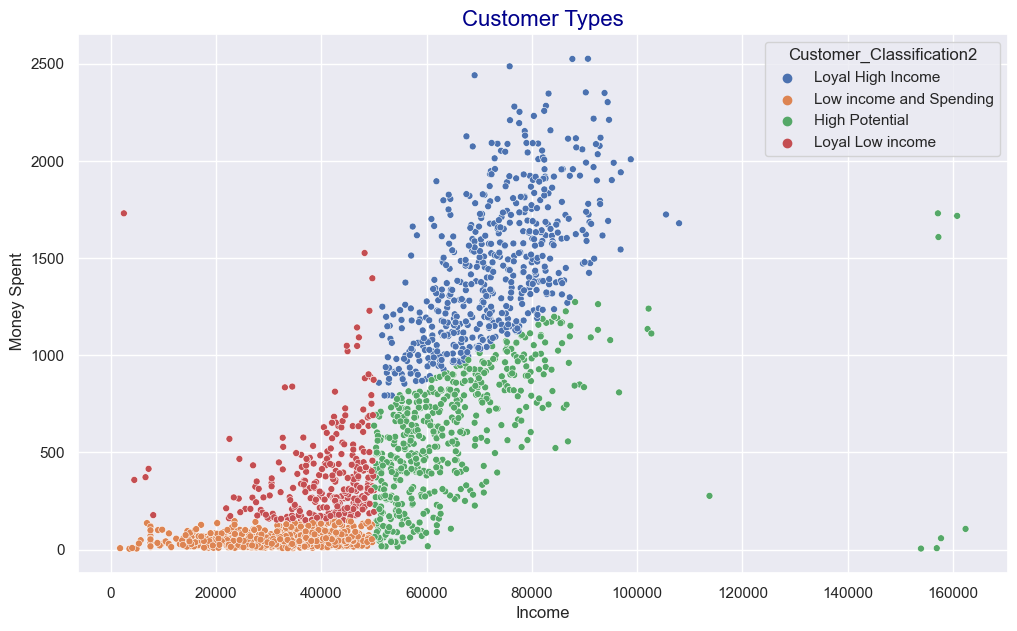

In [219]:
sb.set(style="darkgrid")
plt.figure(figsize=(12,7))
sb.scatterplot(data=df,x='Income',y='Total_Spent', hue='Customer_Classification2', palette='deep', s=25).set_title(label='Customer Types', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')

Text(0, 0.5, '')

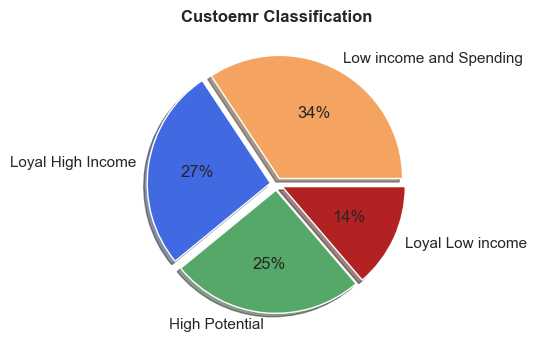

In [220]:
df['Customer_Classification2'].value_counts().plot( kind='pie',figsize= (7,4), explode= [0.05,0.05,0.05,0.05], autopct='%1.0f%%', 
shadow=True, colors= ['sandybrown','royalblue','g', 'firebrick'])
plt.title( label= 'Custoemr Classification',fontweight='bold')
plt.ylabel(None)

In [222]:
df_summary_MA2 = df.groupby('Customer_Classification2').agg(
    {
        'Total_Spent': 'mean',
        'Income':'mean',
        'Total_Num_of_Purchases': 'mean',
        'Age': 'mean',
        'children_home': lambda x: x.value_counts().index[0],
        'Education': lambda x: x.value_counts().index[0],
        'Marital_Status': lambda x: x.value_counts().index[0],
    }
)
df_summary_MA2

Total_Spent        Income  Total_Num_of_Purchases  \
Customer_Classification2                                                      
High Potential             596.964727  65158.895958               15.483245   
Low income and Spending     57.065104  30674.706439                4.871094   
Loyal High Income         1439.912605  72650.011644               19.867227   
Loyal Low income           377.843648  40664.342444               12.110749   

                                Age  children_home   Education Marital_Status  
Customer_Classification2                                                       
High Potential            48.104056              1  Graduation        Married  
Low income and Spending   41.505208              1  Graduation        Married  
Loyal High Income         46.786555              0  Graduation        Married  
Loyal Low income          45.514658              1  Graduation        Married

# Clustering Using Machine learning Clustering Algorithms

## K_means Algorithm

In [70]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, normalize
from kmodes.kprototypes import KPrototypes

In [71]:
scaler = MinMaxScaler()

In [72]:
df_temp = df[['Income','Total_Spent','Total_Num_of_Purchases']]

In [73]:
X = scaler.fit_transform(df_temp)

In [74]:
Km = KMeans(n_clusters=4)
Km.fit(X)
labels_predicted = Km.predict(X)

In [75]:
df_temp['Cluster']= labels_predicted

C:\Users\HP\AppData\Local\Temp\ipykernel_21488\2612025803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Cluster']= labels_predicted


In [114]:
krange = range(1,10)
sse = []
for k in krange:
    Km = KMeans (n_clusters=k)
    Km.fit(X)
    sse.append(Km.inertia_)
    
    

Text(0, 0.5, 'Sum of Squared Error')

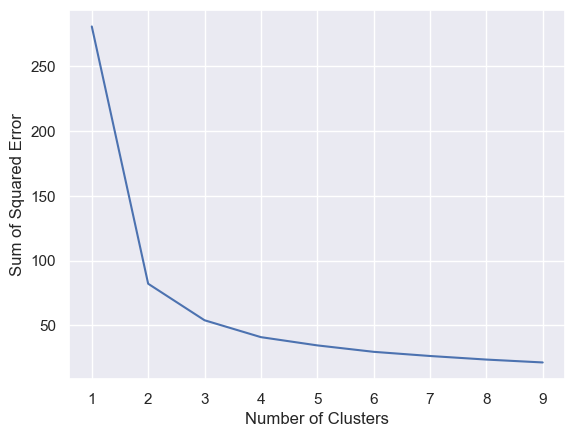

In [115]:
plt.plot(krange,sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')

In [79]:
df_temp.head()

Income  Total_Spent  Total_Num_of_Purchases  Cluster
0  58138.0         1617                      22        1
1  46344.0           27                       4        0
2  71613.0          776                      20        3
3  26646.0           53                       6        0
4  58293.0          422                      14        2

Text(0, 0.5, ' Money Spent')

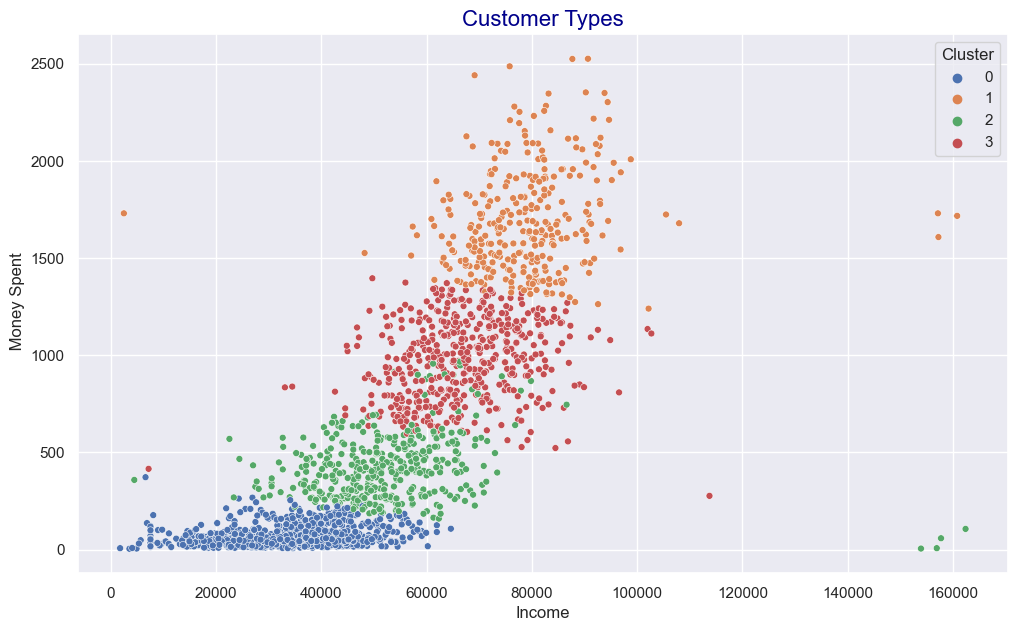

In [80]:
sb.set(style="darkgrid")
plt.figure(figsize=(12,7))
sb.scatterplot(data=df_temp,x='Income',y='Total_Spent', hue='Cluster', palette='deep', s=25).set_title(label='Customer Types', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')

In [81]:
df_summary_Km = df_temp.join(df[['Age','children_home','Education','Marital_Status']]) 

In [82]:
df_summary_Km = df_summary_Km.groupby('Cluster').agg(
    {
        'Total_Spent': 'mean',
        'Income':'mean',
        'Total_Num_of_Purchases': 'mean',
        'Age': 'mean',
        'children_home': lambda x: x.value_counts().index[0],
        'Education': lambda x: x.value_counts().index[0],
        'Marital_Status': lambda x: x.value_counts().index[0],
    }
)
df_summary_Km

Total_Spent        Income  Total_Num_of_Purchases        Age  \
Cluster                                                                 
0          71.242558  32695.353472                5.208379  42.187431   
1        1687.426901  78932.605205               20.198830  45.397661   
2         415.285078  52227.218576               12.906459  47.452116   
3         977.497217  67002.450634               19.725417  47.988868   

         children_home   Education Marital_Status  
Cluster                                            
0                    1  Graduation        Married  
1                    0  Graduation        Married  
2                    1  Graduation        Married  
3                    1  Graduation        Married

Text(0, 0.5, ' Money Spent')

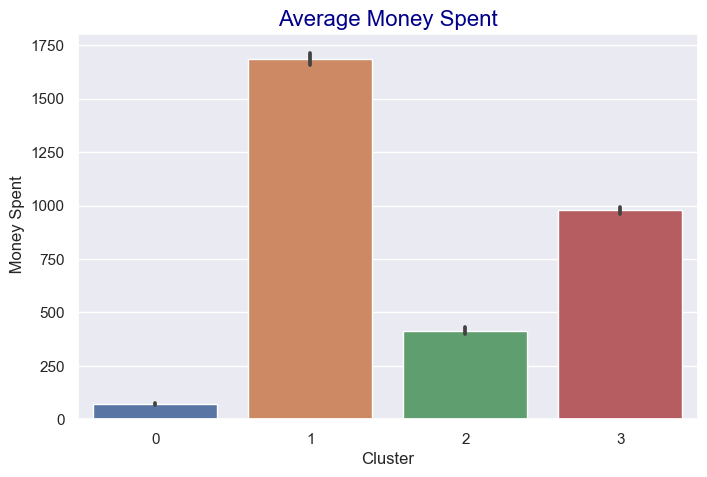

In [83]:
sb.set(style="darkgrid")
plt.figure(figsize=(8,5))
sb.barplot(data=df_temp,y='Total_Spent', x='Cluster', palette='deep').set_title(label='Average Money Spent', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')

Text(0, 0.5, ' Money Spent')

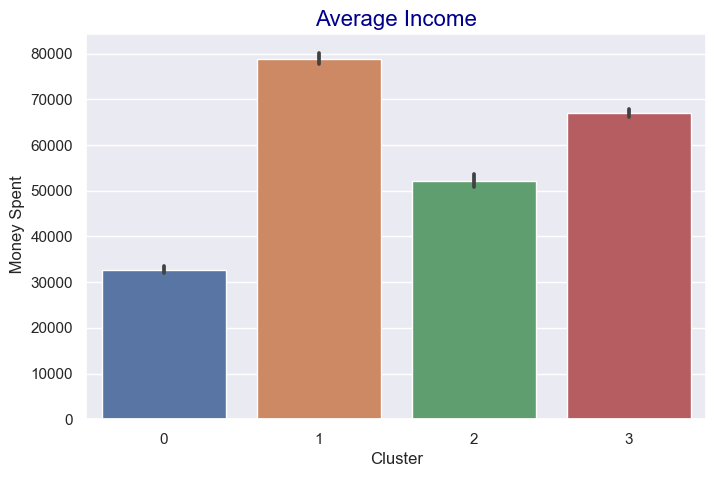

In [84]:
sb.set(style="darkgrid")
plt.figure(figsize=(8,5))
sb.barplot(data=df_temp,y='Income', x='Cluster', palette='deep').set_title(label='Average Income', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')

## DBSCAN Algorithm

In [85]:
from sklearn.cluster import DBSCAN

In [86]:
df_db = df[['Income','Total_Spent','Total_Num_of_Purchases']]

In [87]:

db = DBSCAN(eps=.15,min_samples=5)
labels_db = db.fit_predict(X)

In [88]:
df_db['Cluster']= labels_db

C:\Users\HP\AppData\Local\Temp\ipykernel_21488\1341907235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_db['Cluster']= labels_db


In [89]:
df_db.head()

Income  Total_Spent  Total_Num_of_Purchases  Cluster
0  58138.0         1617                      22        0
1  46344.0           27                       4        0
2  71613.0          776                      20        0
3  26646.0           53                       6        0
4  58293.0          422                      14        0

Text(0, 0.5, ' Money Spent')

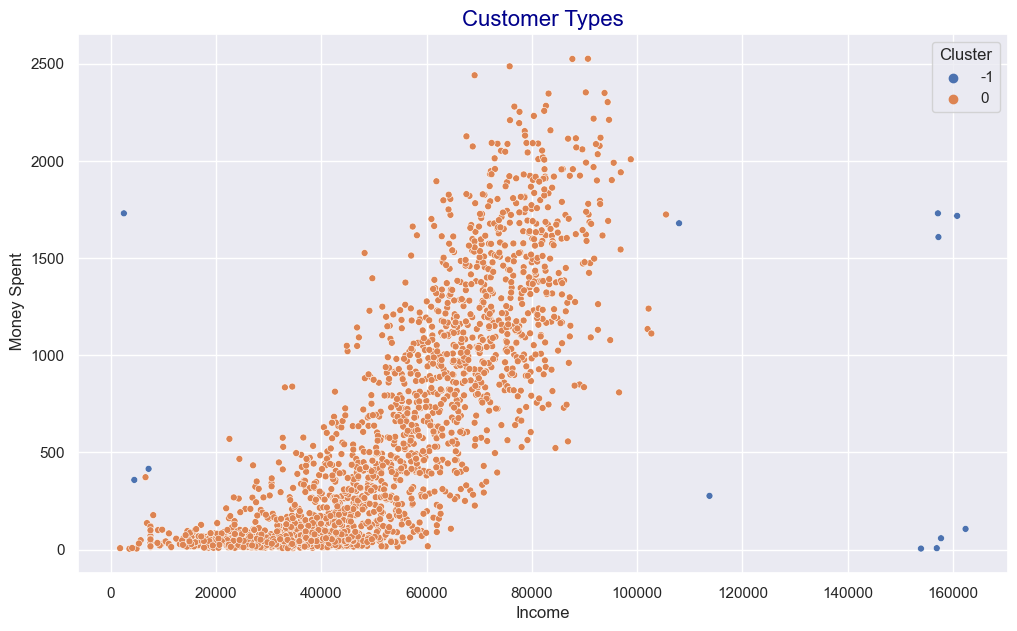

In [90]:
sb.set(style="darkgrid")
plt.figure(figsize=(12,7))
sb.scatterplot(data=df_db,x='Income',y='Total_Spent', hue='Cluster', palette='deep', s=25).set_title(label='Customer Types', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')

Clustering using DBSCAN for this dataset was not found to form desirable clustes.  However, it can be useful to detect outliers present in a dataset.

## Clustering Using K_prototypes Algorithm

In [91]:
#('Education','Marital_Status','Income','Total_Spent','children_home','Age')

In [93]:
df_K_Proto = df[['Total_Spent','Income','Total_Num_of_Purchases','Age','children_home','Education','Marital_Status']]

In [94]:
df_K_Proto['children_home'] = df_K_Proto['children_home'].apply(str)
df_K_Proto.dtypes


C:\Users\HP\AppData\Local\Temp\ipykernel_21488\382758554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_K_Proto['children_home'] = df_K_Proto['children_home'].apply(str)


Total_Spent                 int64
Income                    float64
Total_Num_of_Purchases      int64
Age                         int64
children_home              object
Education                  object
Marital_Status             object
dtype: object

In [95]:
df_K_Proto[['Total_Spent_scaled','Income_scaled','Total_Num_of_Purchases_scaled','Age_scaled']] = MinMaxScaler().fit_transform(df_K_Proto.select_dtypes('number'))

C:\Users\HP\AppData\Local\Temp\ipykernel_21488\1615669327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_K_Proto[['Total_Spent_scaled','Income_scaled','Total_Num_of_Purchases_scaled','Age_scaled']] = MinMaxScaler().fit_transform(df_K_Proto.select_dtypes('number'))
C:\Users\HP\AppData\Local\Temp\ipykernel_21488\1615669327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_K_Proto[['Total_Spent_scaled','Income_scaled','Total_Num_of_Purchases_scaled','Age_scaled']] = MinMaxScaler().fit_transform(df

In [96]:
df_K_Proto_scaled = df_K_Proto[['Total_Spent_scaled','Income_scaled','Total_Num_of_Purchases_scaled','Age_scaled','children_home','Education','Marital_Status']]

In [97]:
df_K_Proto_scaled

Total_Spent_scaled  Income_scaled  Total_Num_of_Purchases_scaled  \
0               0.639683       0.351086                        0.68750   
1               0.008730       0.277680                        0.12500   
2               0.305952       0.434956                        0.62500   
3               0.019048       0.155079                        0.18750   
4               0.165476       0.352051                        0.43750   
...                  ...            ...                            ...   
2232            0.530159       0.370288                        0.50000   
2233            0.174206       0.387659                        0.46875   
2234            0.490476       0.343885                        0.56250   
2235            0.332540       0.420217                        0.65625   
2236            0.066270       0.318292                        0.25000   

      Age_scaled children_home   Education Marital_Status  
0       0.406250             0  Graduation         Single  
1       0.437500             2  Graduation         Single  
2       0.322917             0  Graduation       Together  
3       0.125000             1  Graduation       Together  
4       0.156250             1         PhD        Married  
...          ...           ...         ...            ...  
2232    0.302083             1  Graduation        Married  
2233    0.520833             3         PhD       Together  
2234    0.156250             0  Graduation       Divorced  
2235    0.416667             1      Master       Together  
2236    0.437500             2         PhD        Married  

[2237 rows x 7 columns]

In [226]:
# We nned to get the position index of the categorical columns for the K_Prototype Algorithm
catColumnsPos = [df_K_Proto.columns.get_loc(col) for col in list(df_K_Proto_scaled.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_K_Proto_scaled.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['children_home', 'Education', 'Marital_Status']
Categorical columns position  : [4, 5, 6]


In [ ]:
cost = []
for cluster in range(1, 20):
    kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
    kprototype.fit_predict(df_K_Proto_scaled, categorical = catColumnsPos)
    cost.append(kprototype.cost_)
    print('Cluster initiation: {}'.format(cluster))

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19


Text(0, 0.5, 'Cost')

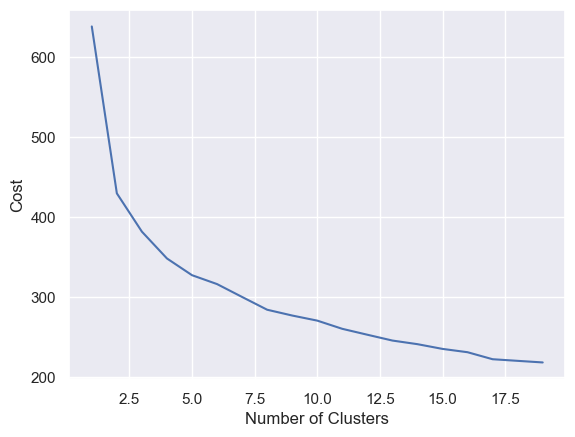

In [ ]:
plt.plot(range(1,20),cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')

In [227]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
kprototype.fit_predict(df_K_Proto_scaled, categorical = catColumnsPos)

array([2, 0, 2, ..., 2, 3, 0], dtype=uint16)

In [228]:
df_K_Proto['Cluster Labels'] = kprototype.labels_

C:\Users\HP\AppData\Local\Temp\ipykernel_21488\1780162495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_K_Proto['Cluster Labels'] = kprototype.labels_


In [229]:
df_K_Proto

Total_Spent   Income  Total_Num_of_Purchases  Age children_home  \
0            1617  58138.0                      22   57             0   
1              27  46344.0                       4   60             2   
2             776  71613.0                      20   49             0   
3              53  26646.0                       6   30             1   
4             422  58293.0                      14   33             1   
...           ...      ...                     ...  ...           ...   
2232         1341  61223.0                      16   47             1   
2233          444  64014.0                      15   68             3   
2234         1241  56981.0                      18   33             0   
2235          843  69245.0                      21   58             1   
2236          172  52869.0                       8   60             2   

       Education Marital_Status  Total_Spent_scaled  Income_scaled  \
0     Graduation         Single            0.639683       0.351086   
1     Graduation         Single            0.008730       0.277680   
2     Graduation       Together            0.305952       0.434956   
3     Graduation       Together            0.019048       0.155079   
4            PhD        Married            0.165476       0.352051   
...          ...            ...                 ...            ...   
2232  Graduation        Married            0.530159       0.370288   
2233         PhD       Together            0.174206       0.387659   
2234  Graduation       Divorced            0.490476       0.343885   
2235      Master       Together            0.332540       0.420217   
2236         PhD        Married            0.066270       0.318292   

      Total_Num_of_Purchases_scaled  Age_scaled  Cluster Labels  
0                           0.68750    0.406250               2  
1                           0.12500    0.437500               0  
2                           0.62500    0.322917               2  
3                           0.18750    0.125000               1  
4                           0.43750    0.156250               3  
...                             ...         ...             ...  
2232                        0.50000    0.302083               3  
2233                        0.46875    0.520833               3  
2234                        0.56250    0.156250               2  
2235                        0.65625    0.416667               3  
2236                        0.25000    0.437500               0  

[2237 rows x 12 columns]

Text(0, 0.5, ' Money Spent')

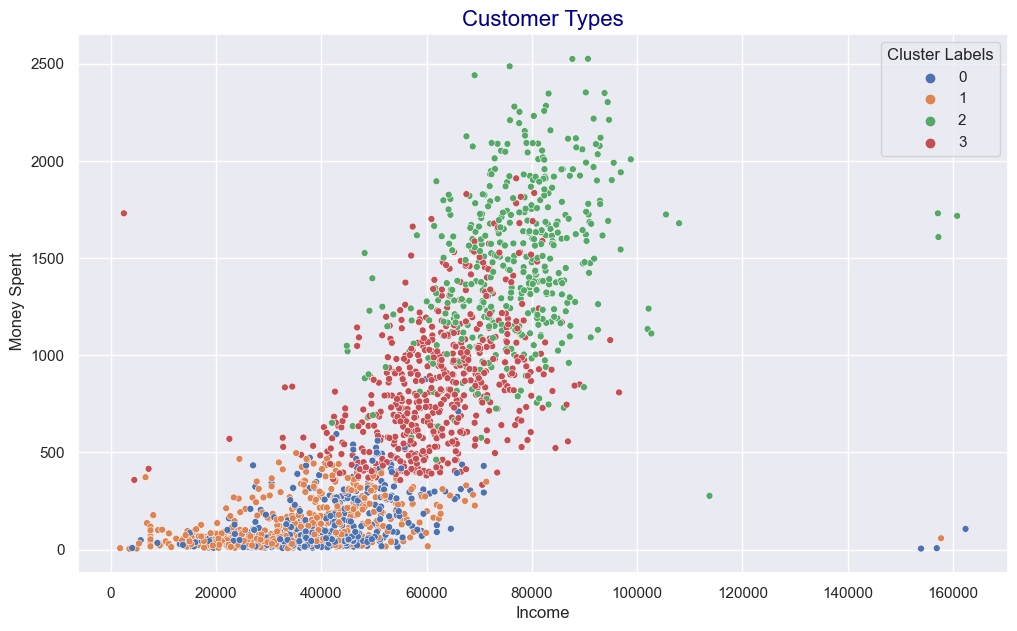

In [230]:
sb.set(style="darkgrid")
plt.figure(figsize=(12,7))
sb.scatterplot(data=df_K_Proto,x='Income',y='Total_Spent', hue='Cluster Labels', palette='deep', s=25).set_title(label='Customer Types', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')

In [ ]:
df_K_Proto_summary = df_K_Proto.groupby('Cluster Labels').agg(
    {
        'Total_Spent': 'mean',
        'Income':'mean',
        'Total_Num_of_Purchases': 'mean',
        'Age': 'mean',
        'children_home': lambda x: x.value_counts().index[0],
        'Education': lambda x: x.value_counts().index[0],
        'Marital_Status': lambda x: x.value_counts().index[0],
    }
)
df_K_Proto_summary

Total_Spent        Income  Total_Num_of_Purchases        Age  \
Cluster Labels                                                                 
0                136.457589  40754.795602                6.765625  50.147321   
1                118.008463  33576.704879                6.361072  38.693935   
2               1462.058091  76712.788233               19.477178  45.070539   
3                845.381271  62164.519221               18.612040  49.060201   

               children_home   Education Marital_Status  
Cluster Labels                                           
0                          2  Graduation        Married  
1                          1  Graduation        Married  
2                          0  Graduation         Single  
3                          1  Graduation        Married

# Conclusion
Different clustering methods was used to clustrer customers into different categories.
Statistical methods and machine learning clustering algorithms (K-means, K-prototype, and DBSCAN were) were used.
Excluding DBSCAN, different methods methods gave slightly different clusters. However, it was noticed that one of the most important criteria to give sensible clusters is choosing the features. Choosing bad or unuseful input features leads to obtaining unsensible clusters for the business customers.
